# Load dataset

In [1]:
import pandas as pd
df = pd.read_csv('/content/health_data_10000_chunk - health_data_10000_chunk.csv')
df.head()

,Height (cm),Weight (kg),BMI,Medical conditions,Medications in use,Residential Address,Previous gastrointestinal issues,Family history of diseases,Previous surgeries,Previous therapies,...,Current status of microbiota,Intestinal health indicators,Comparison with optimal values,Supplement Plan - Recommended products,Supplement Plan - Dosages and timings,Supplement Plan - Intake tracking,Supplement Plan - Automatic reminders,Meal Plan - Recommended/avoided foods,Weekly menu,Personalized recipes
0,173,120,40.1,"Diabetes, Anemia","Aspirin, Levothyroxine","17761 Coleman Coves Suite 307\nWest Ryan, FL 8...",True,"Cancer, Diabetes",Appendectomy,Chiropractic,...,At Risk,Optimal,84.68,"Vitamin D, Prebiotic","Twice daily, Once daily",True,True,"Eggs, Bread, Broccoli","Steak, Rice, Salad","Rice Pudding, Vegan Salad"
1,183,110,32.8,"Asthma, Anemia","Lisinopril, Aspirin","11610 Thompson Trail\nSouth Steven, CA 97229",False,"Cancer, Heart disease",Knee surgery,Cognitive Behavioral Therapy,...,Optimal,Suboptimal,70.68,"Prebiotic, Vitamin D","Once daily, After meals",False,False,"Broccoli, Eggs, Fish","Salad, Pasta, Rice","Rice Pudding, Vegan Salad"
2,160,111,43.4,"Hypertension, Asthma","Aspirin, Lisinopril","89841 Nguyen Station\nNew Jennafurt, WA 05070",False,"Cancer, Diabetes",Knee surgery,Physical therapy,...,Optimal,At Risk,80.09,"Probiotic, Magnesium","Once daily, After meals",False,True,"Bread, Eggs, Broccoli","Steak, Salad, Pasta","Rice Pudding, Grilled Chicken"
3,177,75,23.9,"Anemia, Asthma","Metformin, Lisinopril","194 Adam Alley\nRoachville, CO 73756",True,"Hypertension, Diabetes",Knee surgery,Chiropractic,...,Optimal,At Risk,63.77,"Magnesium, Probiotic","Once daily, Twice daily",False,True,"Bread, Fish, Broccoli","Pasta, Rice, Steak","Fruit Smoothie, Grilled Chicken"
4,170,97,33.6,"Hypertension, Asthma","Lisinopril, Insulin","420 Griffin Rest Suite 963\nNew Allisonburgh, ...",True,"Heart disease, Hypertension",Appendectomy,Cognitive Behavioral Therapy,...,Optimal,Suboptimal,76.98,"Omega-3, Probiotic","Twice daily, After meals",False,False,"Bread, Chicken, Broccoli","Steak, Pasta, Salad","Grilled Chicken, Fruit Smoothie"


In [2]:
df.shape

(10000, 54)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 54 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Height (cm)                                       10000 non-null  int64  
 1   Weight (kg)                                       10000 non-null  int64  
 2   BMI                                               10000 non-null  float64
 3   Medical conditions                                10000 non-null  object 
 4   Medications in use                                10000 non-null  object 
 5   Residential Address                               10000 non-null  object 
 6   Previous gastrointestinal issues                  10000 non-null  bool   
 7   Family history of diseases                        10000 non-null  object 
 8   Previous surgeries                                10000 non-null  object 
 9   Previous therapies

# Step-1: Exploratory Data Analysis

### Unnecessary column drop

In [4]:
# Drop the 'Residential Address' column
df = df.drop(columns=['Residential Address'])

### Visualize the distribution of the target variable

In [5]:
df['Current status of microbiota'].value_counts()

,count
Current status of microbiota,
Suboptimal,4672
Optimal,4554
At Risk,774


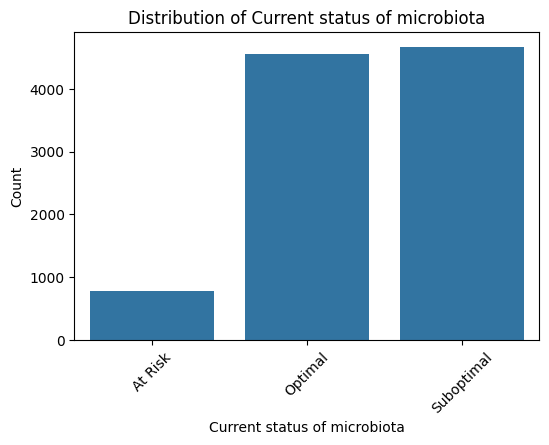

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Current status of microbiota', data=df)
plt.title('Distribution of Current status of microbiota')
plt.xlabel('Current status of microbiota')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Rank the target column- current status of microbiota

In [7]:
import pandas as pd

# Step 1: Manual rank mapping
rank_map = {'Optimal': 0, 'Suboptimal': 1, 'At Risk': 2}
df['Microbiota_status_ranked'] = df['Current status of microbiota'].map(rank_map)

# Drop the original target string column
df=df.drop(columns=['Current status of microbiota'])

### Convert multi item column into numerical such as Meal Plan, Weekly Menu, and Personalized Recipes

In [8]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
def multi_hot_encode_column(df, column_name):
    items_list = df[column_name].str.split(',\s*')
    mlb = MultiLabelBinarizer()
    binary_matrix = mlb.fit_transform(items_list)
    new_cols = [f"{column_name}_{item}" for item in mlb.classes_]
    return pd.DataFrame(binary_matrix, columns=new_cols, index=df.index)

multi_label_columns = [
    'Medical conditions',
    'Family history of diseases',
    'Diagnosed conditions',
    'Relevant family history',
    'Meal Plan - Recommended/avoided foods',
    'Weekly menu',
    'Personalized recipes',
    'Supplement Plan - Recommended products',
    'Supplement Plan - Dosages and timings',
    'Medications in use'
]

encoded_dfs = [multi_hot_encode_column(df, col) for col in multi_label_columns]

encoded_all = pd.concat(encoded_dfs, axis=1)

df_cleaned = df.drop(columns=multi_label_columns)

df_final = pd.concat([df_cleaned, encoded_all], axis=1)

In [9]:
df_final.shape

(10000, 89)

In [10]:
df_final.head()

,Height (cm),Weight (kg),BMI,Previous gastrointestinal issues,Previous surgeries,Previous therapies,Frequency of bowel movements,Stool consistency (Bristol scale),Presence of bloating,Presence of gas,...,Supplement Plan - Recommended products_Probiotic,Supplement Plan - Recommended products_Vitamin D,Supplement Plan - Dosages and timings_After meals,Supplement Plan - Dosages and timings_Once daily,Supplement Plan - Dosages and timings_Twice daily,Medications in use_Aspirin,Medications in use_Insulin,Medications in use_Levothyroxine,Medications in use_Lisinopril,Medications in use_Metformin
0,173,120,40.1,True,Appendectomy,Chiropractic,6,2,False,True,...,0,1,0,1,1,1,0,1,0,0
1,183,110,32.8,False,Knee surgery,Cognitive Behavioral Therapy,18,6,True,True,...,0,1,1,1,0,1,0,0,1,0
2,160,111,43.4,False,Knee surgery,Physical therapy,6,6,False,True,...,1,0,1,1,0,1,0,0,1,0
3,177,75,23.9,True,Knee surgery,Chiropractic,16,7,True,False,...,1,0,0,1,1,0,0,0,1,1
4,170,97,33.6,True,Appendectomy,Cognitive Behavioral Therapy,17,4,True,False,...,1,0,1,0,1,0,1,0,1,0


### Target encoding

In [11]:
selected_categorical_cols = list(set([
    'Physical activity type', 'Current diet', 'Intestinal health indicators',
    'Previous surgeries', 'Previous therapies', 'Known intolerances',
    'Regular medications', 'Abdominal surgeries', 'Food allergies', 'Other supplements'
]))

for col in selected_categorical_cols:
    category_means = df_final.groupby(col)['Microbiota_status_ranked'].mean()
    df_final[f'{col}_encoded'] = df_final[col].map(category_means)

df_final_target = df_final.drop(columns=selected_categorical_cols)

### Convert boolean columns into numerical

In [12]:
# Automatically detect boolean columns
bool_columns = df_final_target.select_dtypes(include='bool').columns

# Convert them to integer (True → 1, False → 0)
df_final_target[bool_columns] = df_final_target[bool_columns].astype(int)


In [13]:
df_final_target['Smoking status (Yes/No, quantity)'] = df_final_target['Smoking status (Yes/No, quantity)'].apply(lambda x: 1 if x == 'Yes' else 0)

In [14]:
df_final_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 89 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Height (cm)                                        10000 non-null  int64  
 1   Weight (kg)                                        10000 non-null  int64  
 2   BMI                                                10000 non-null  float64
 3   Previous gastrointestinal issues                   10000 non-null  int64  
 4   Frequency of bowel movements                       10000 non-null  int64  
 5   Stool consistency (Bristol scale)                  10000 non-null  int64  
 6   Presence of bloating                               10000 non-null  int64  
 7   Presence of gas                                    10000 non-null  int64  
 8   Presence of abdominal pain                         10000 non-null  int64  
 9   Difficu

### Visualization of outlier

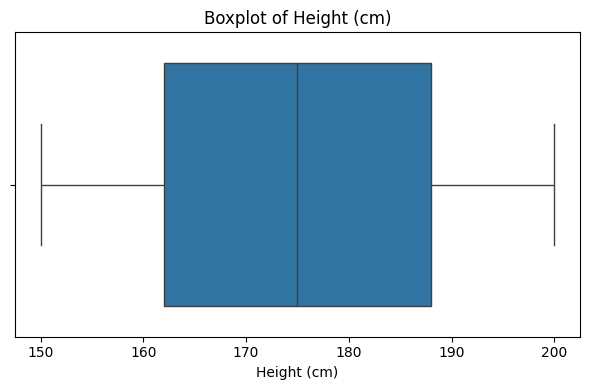

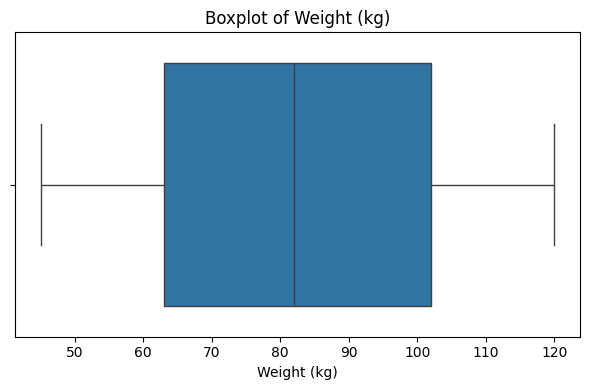

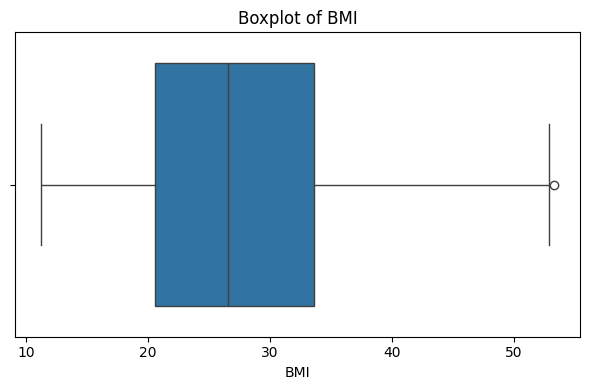

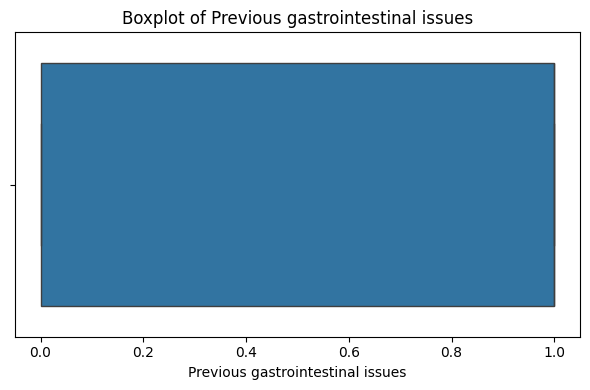

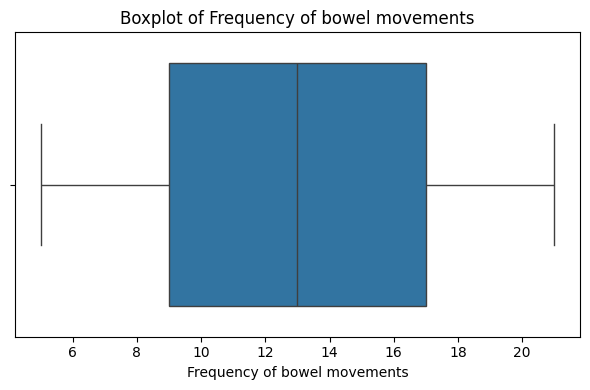

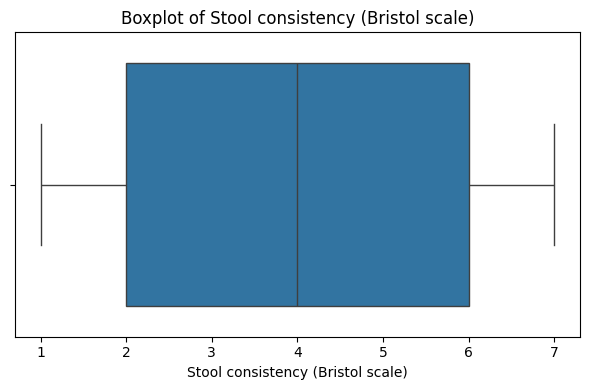

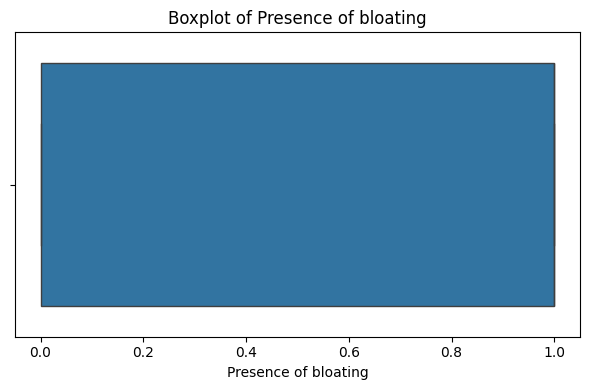

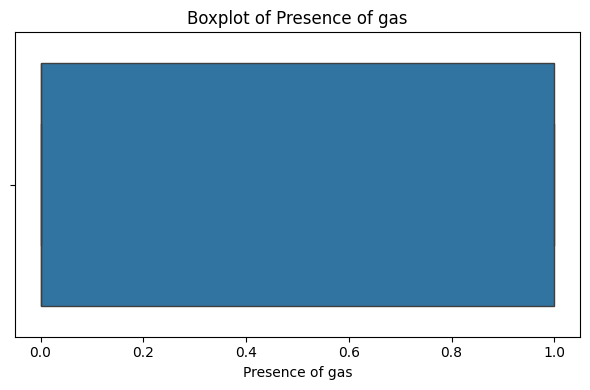

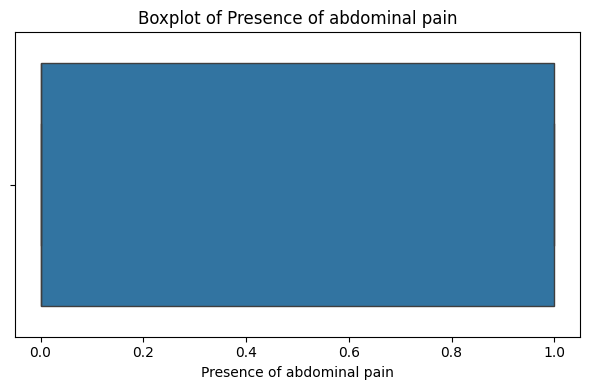

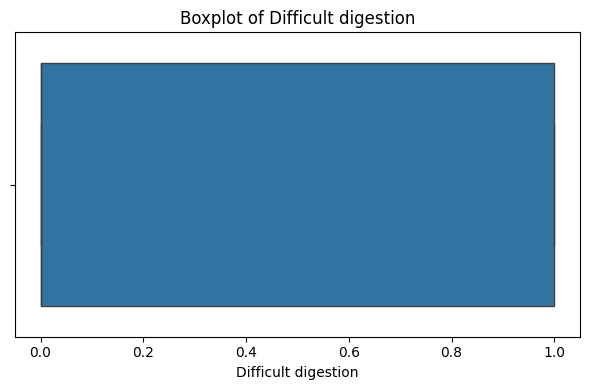

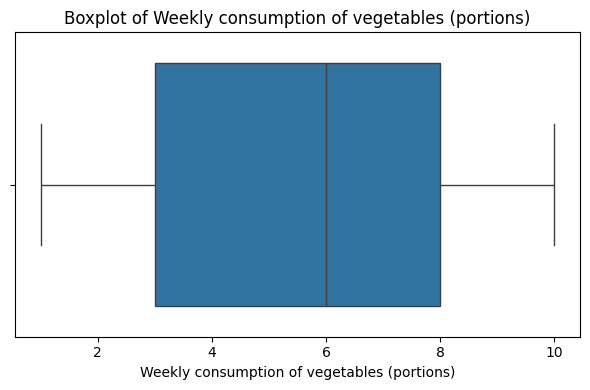

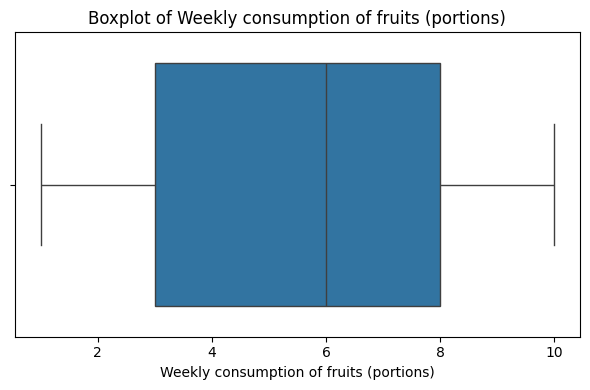

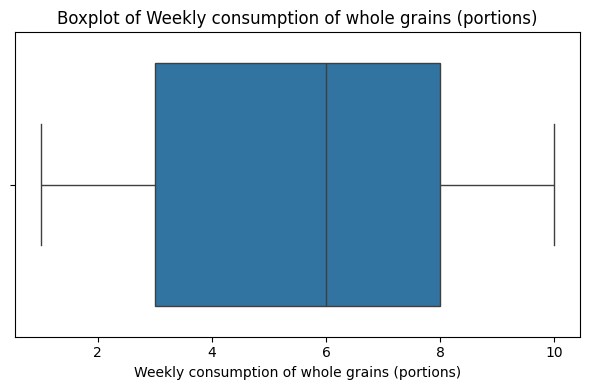

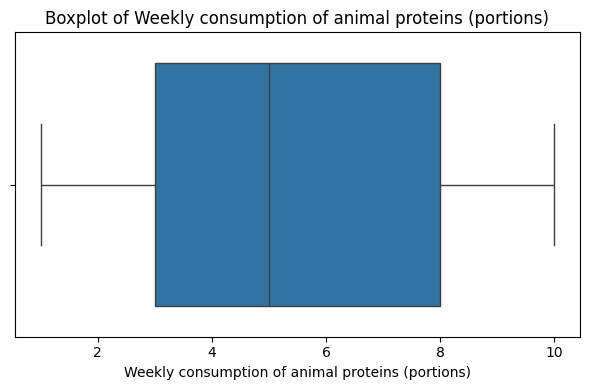

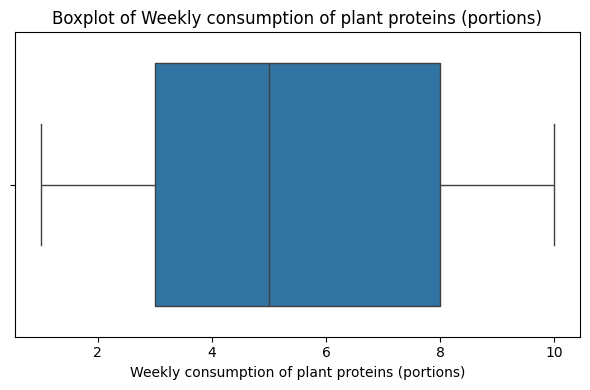

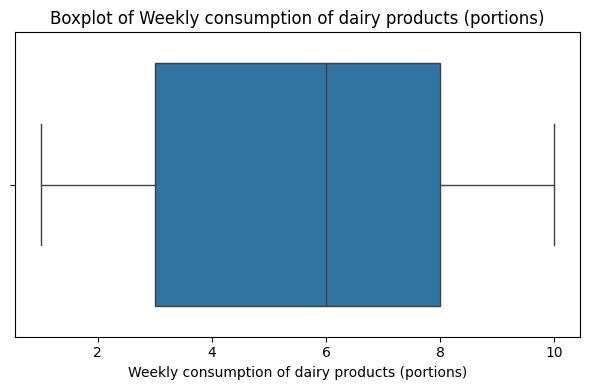

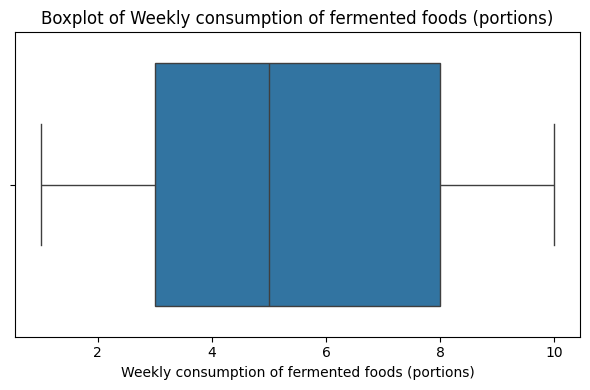

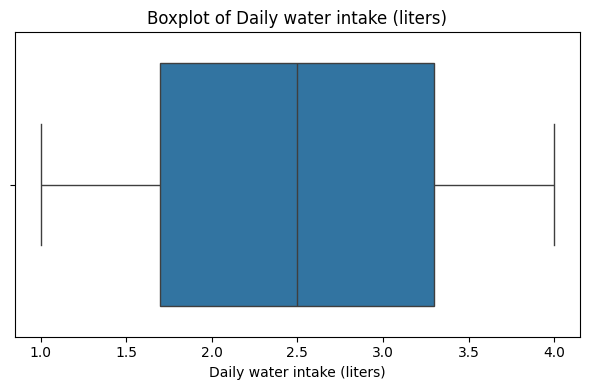

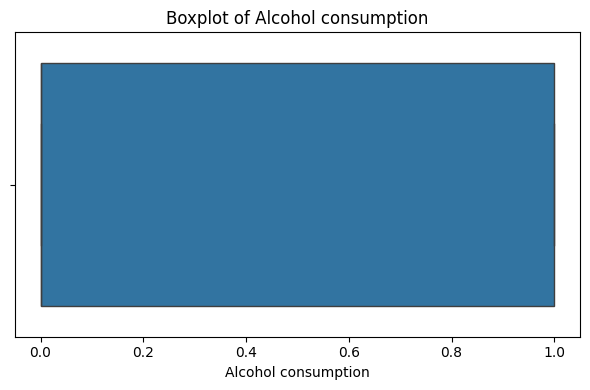

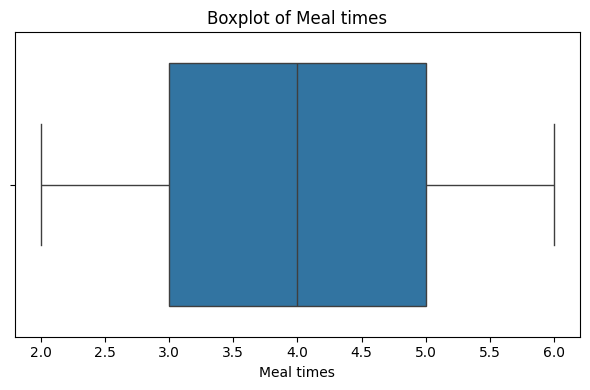

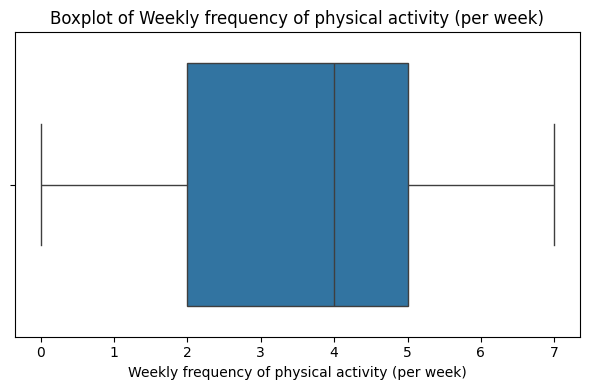

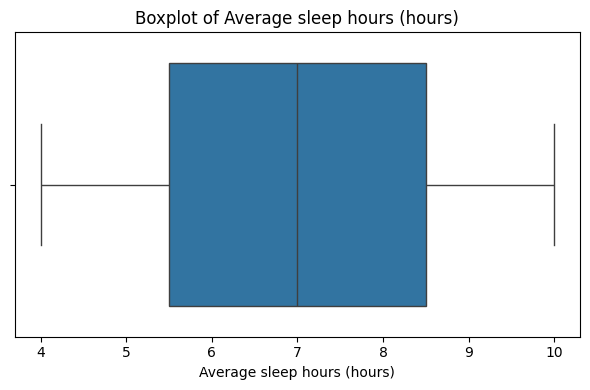

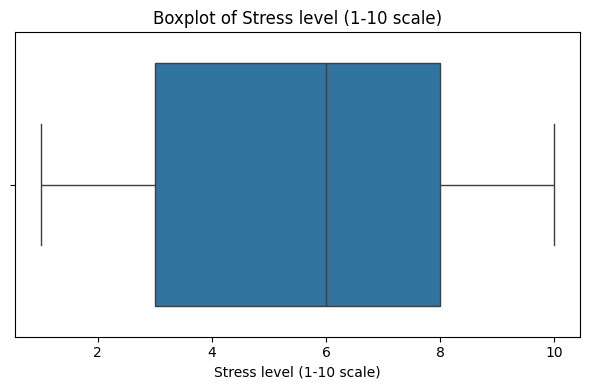

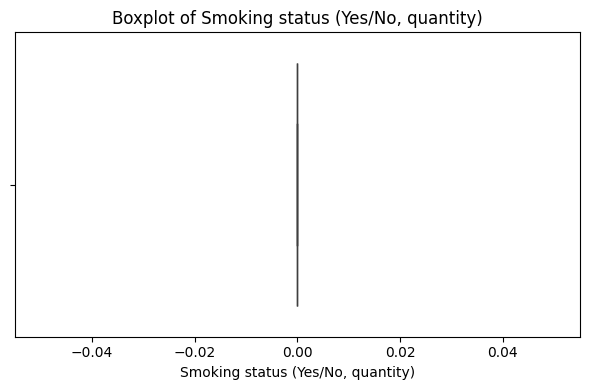

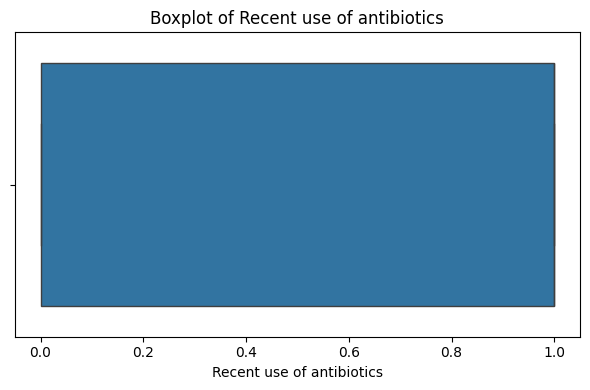

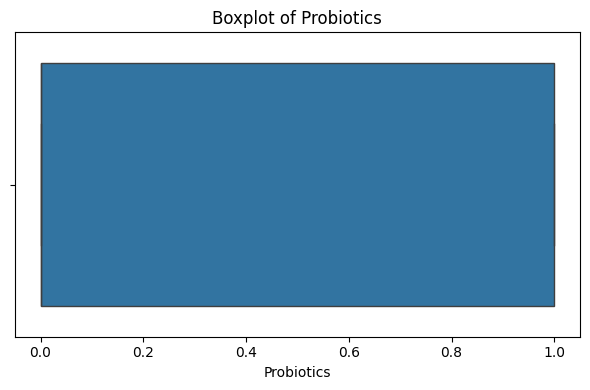

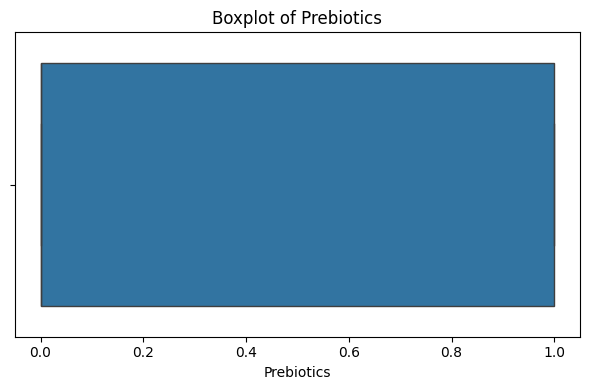

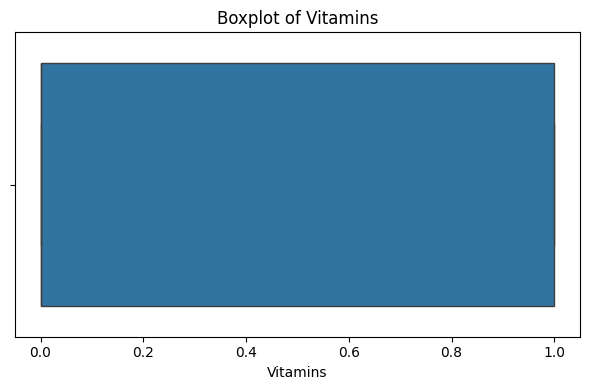

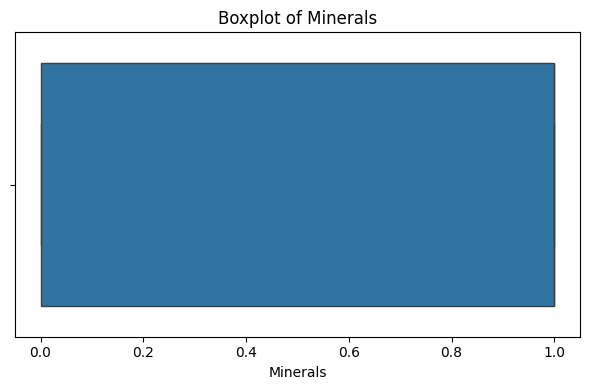

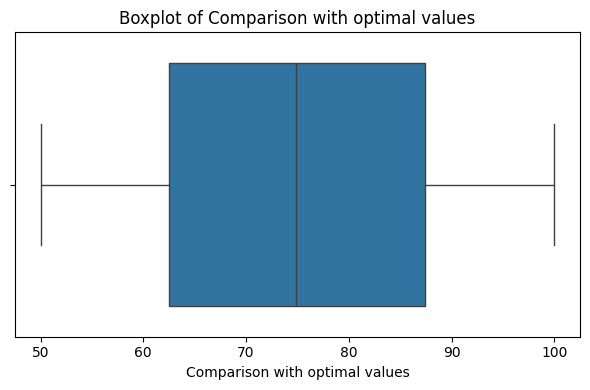

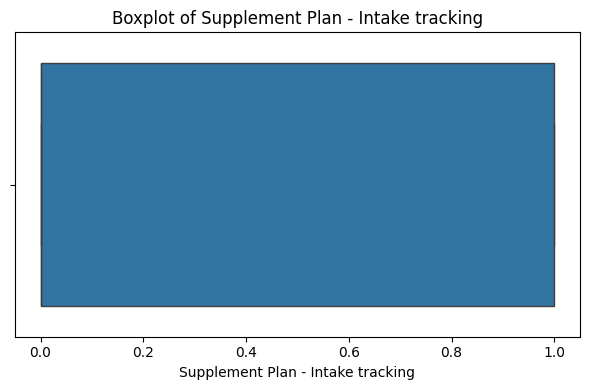

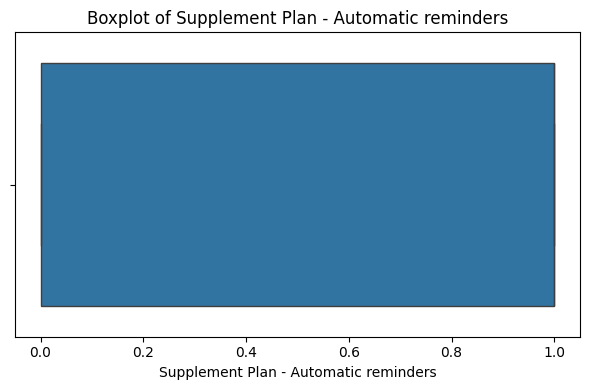

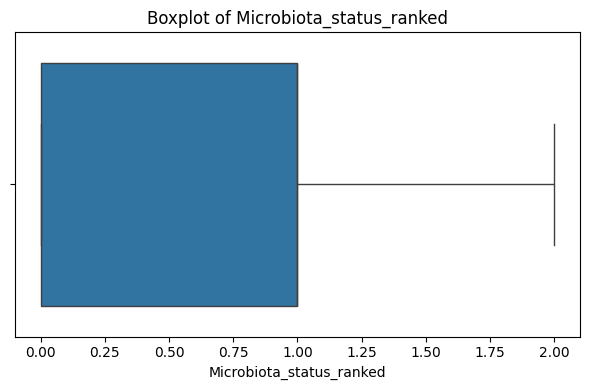

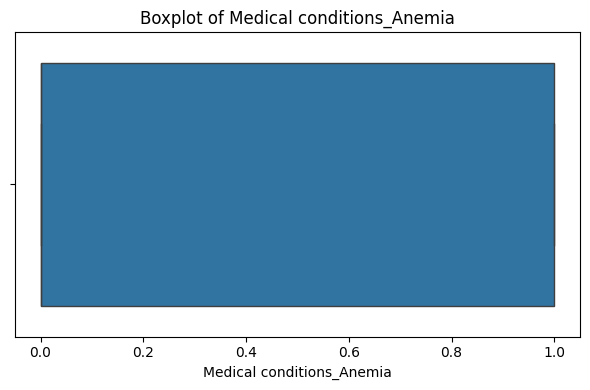

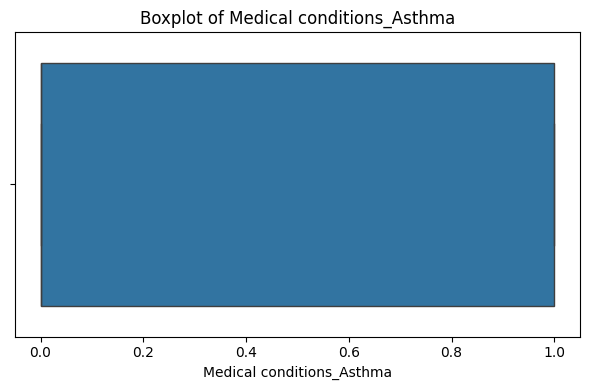

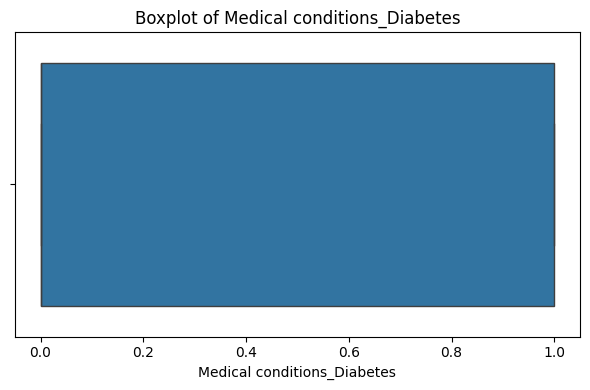

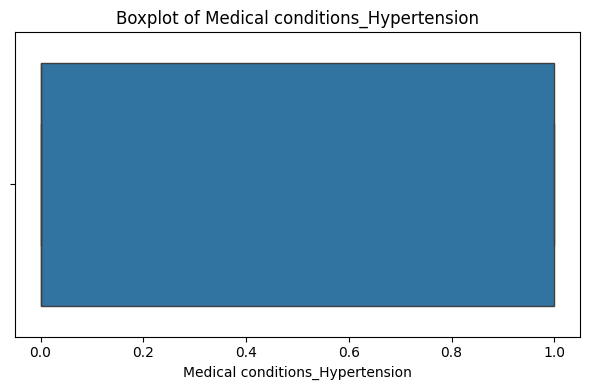

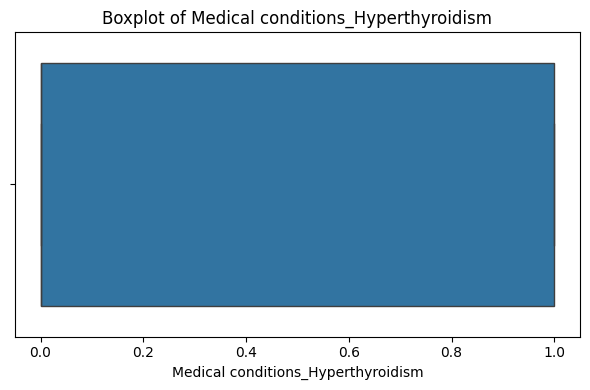

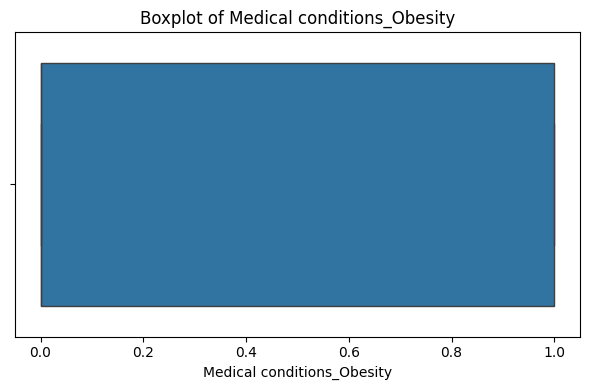

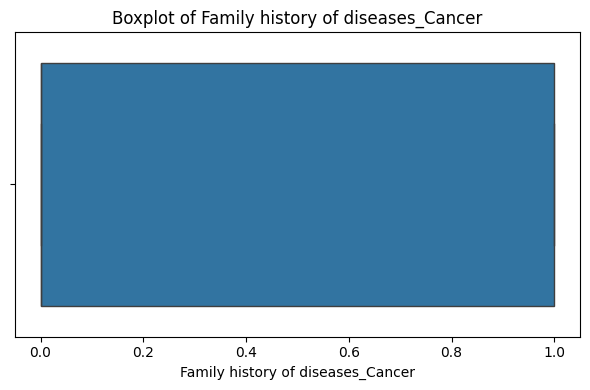

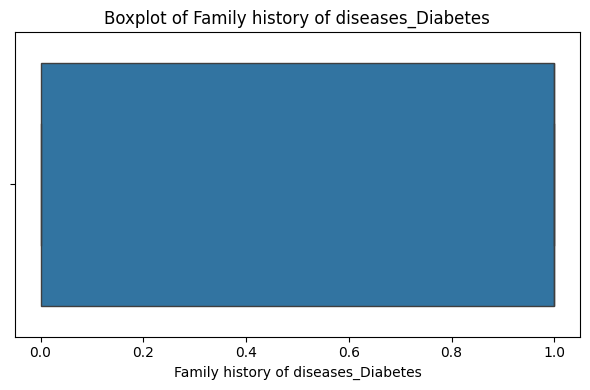

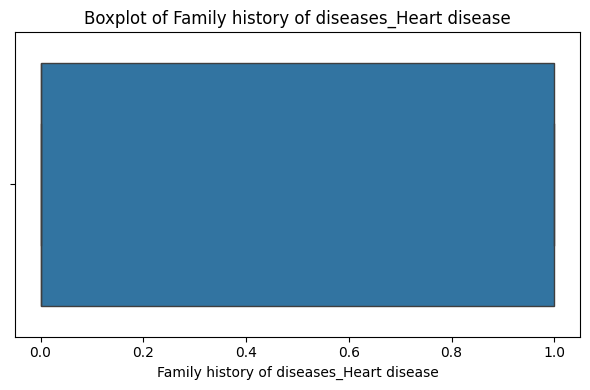

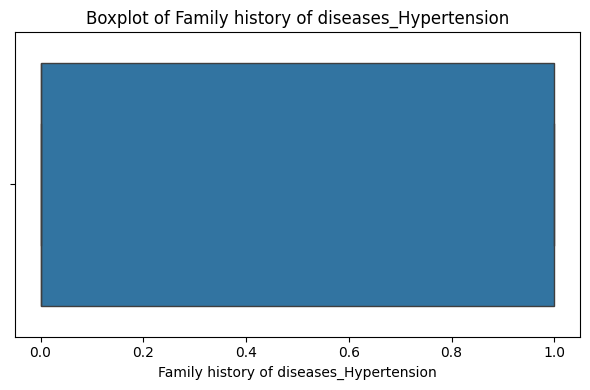

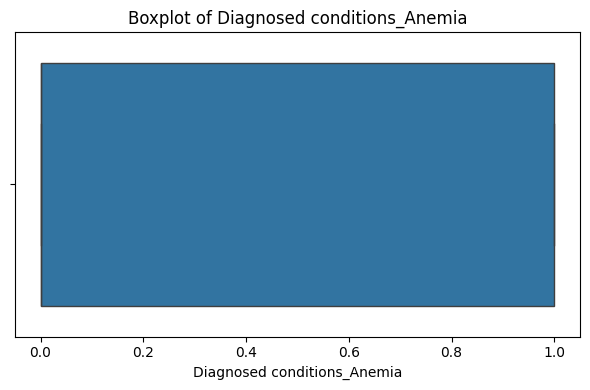

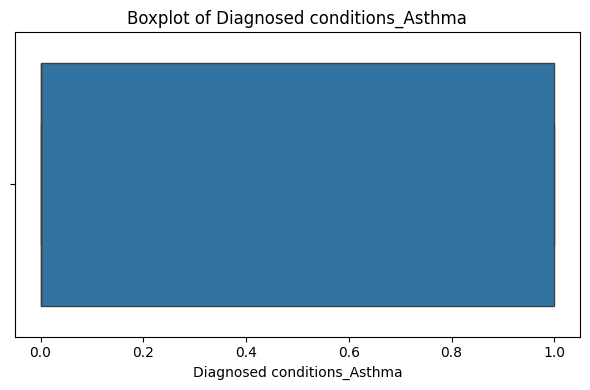

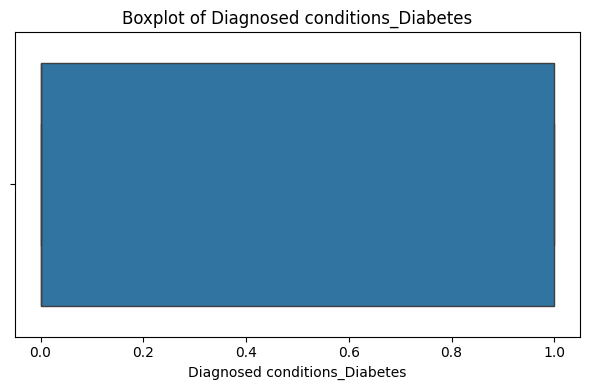

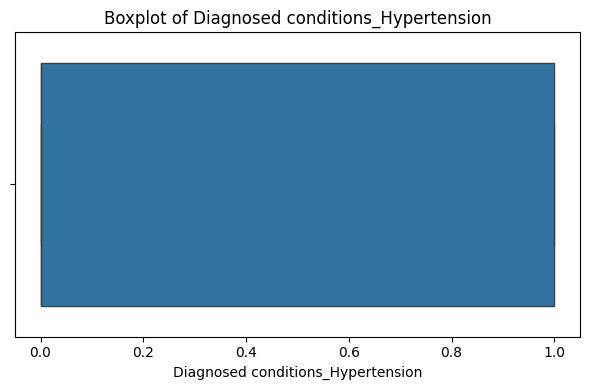

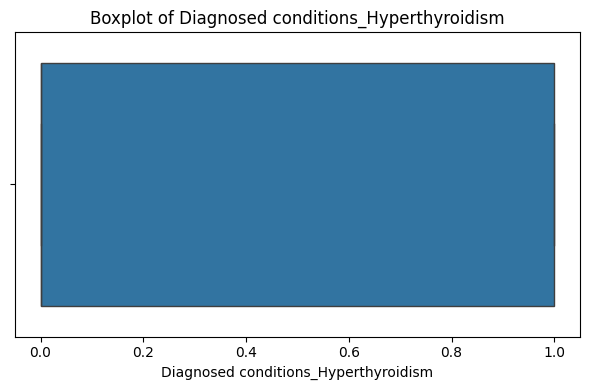

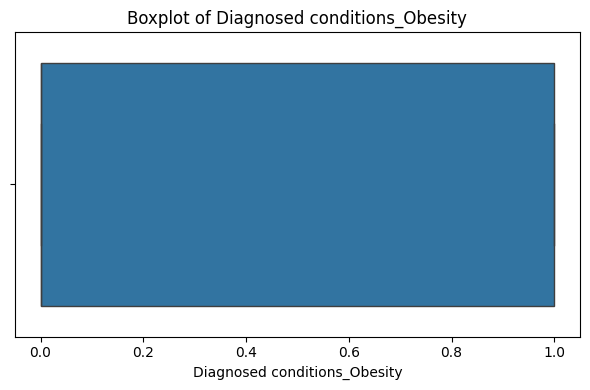

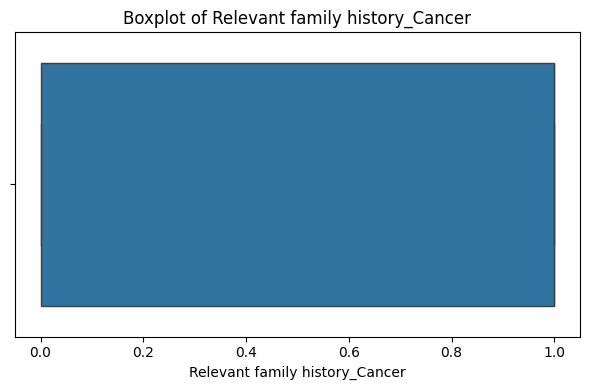

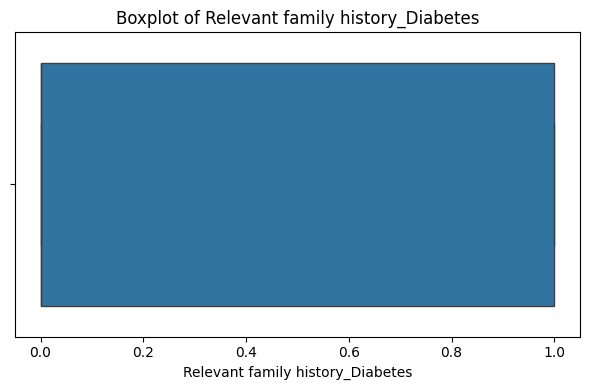

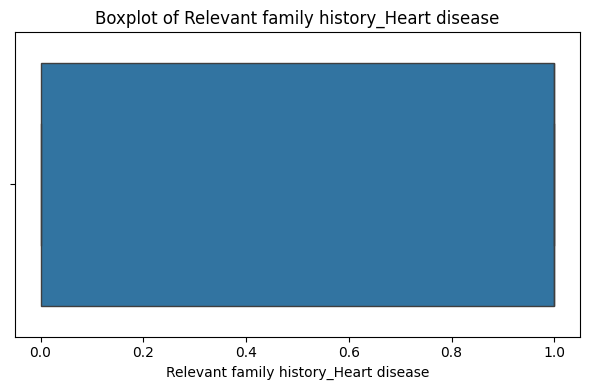

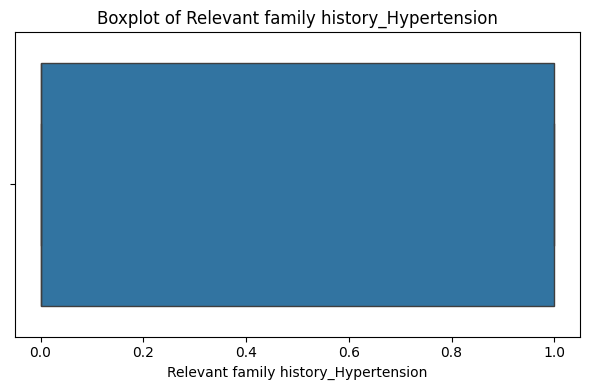

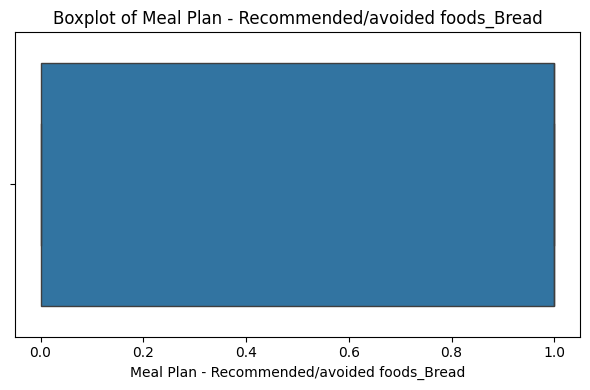

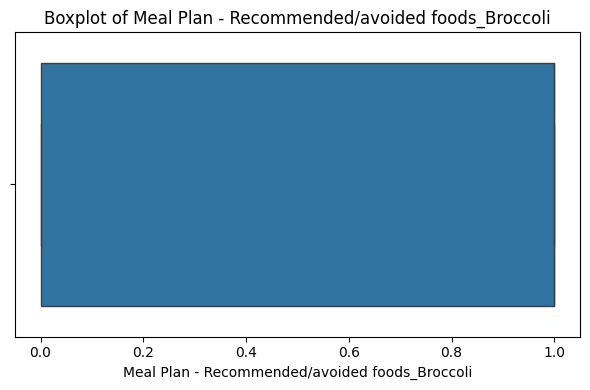

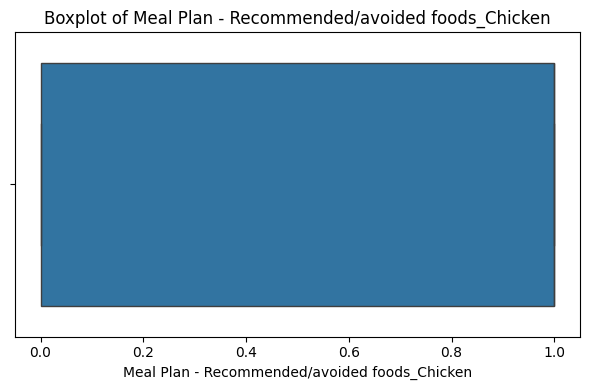

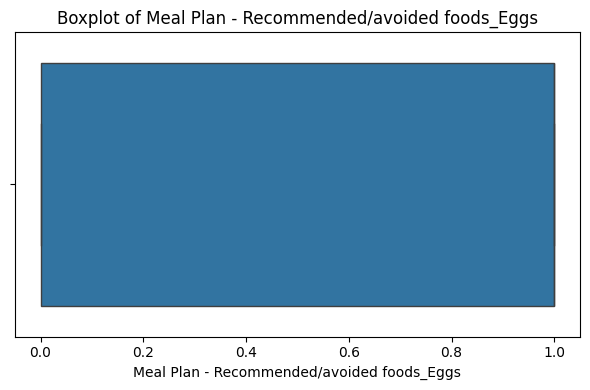

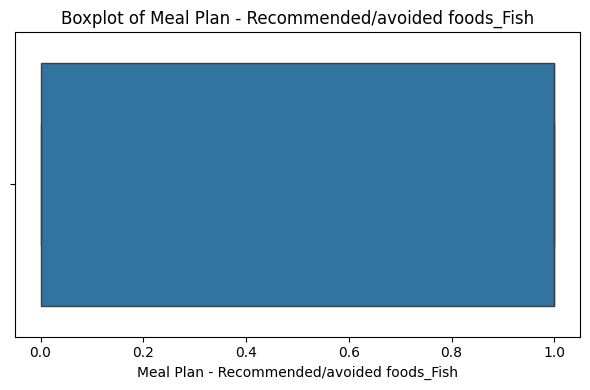

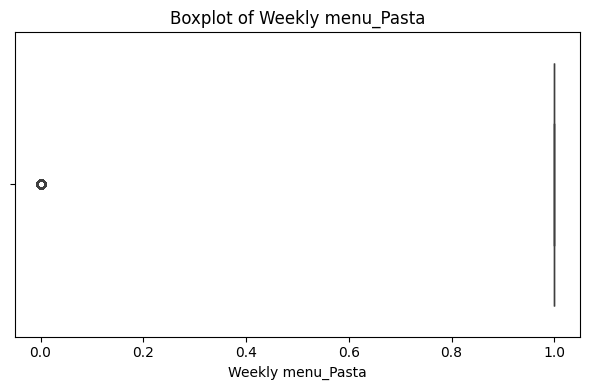

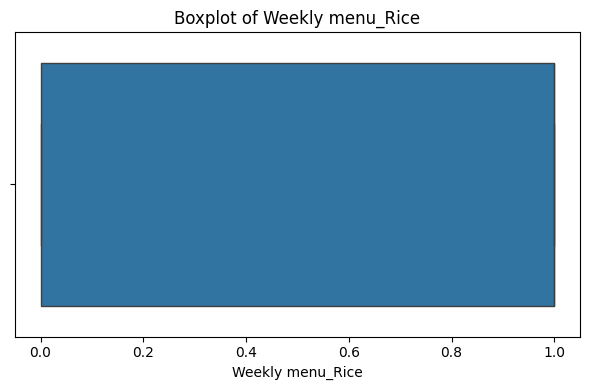

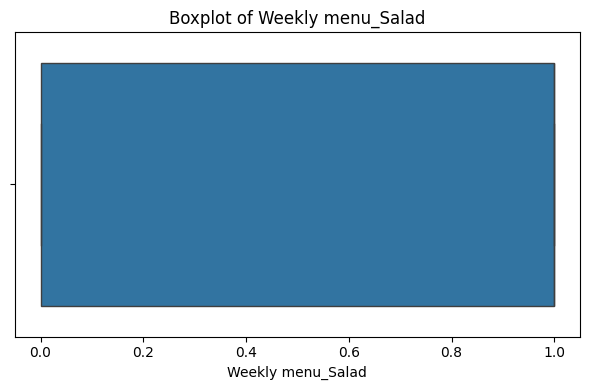

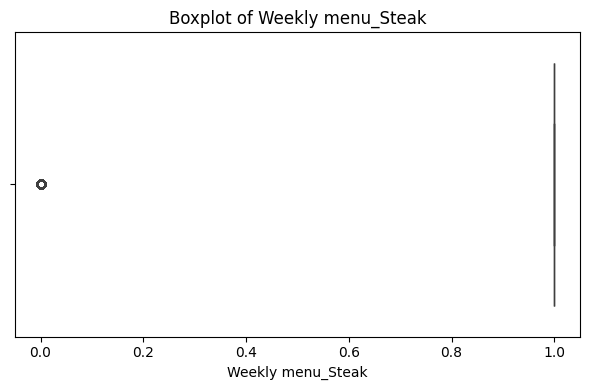

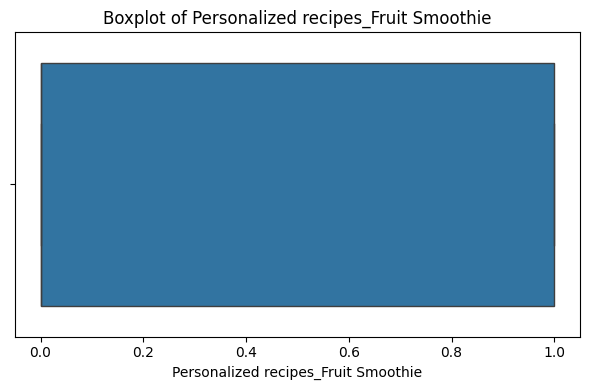

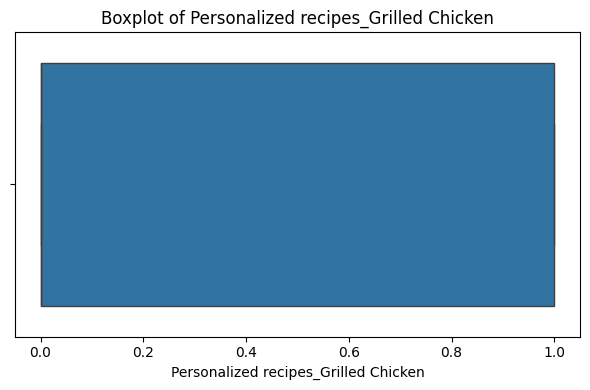

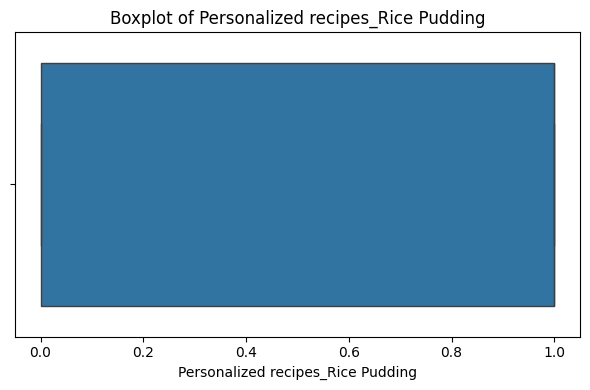

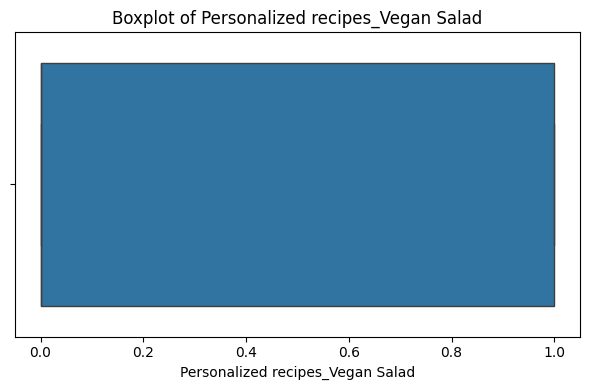

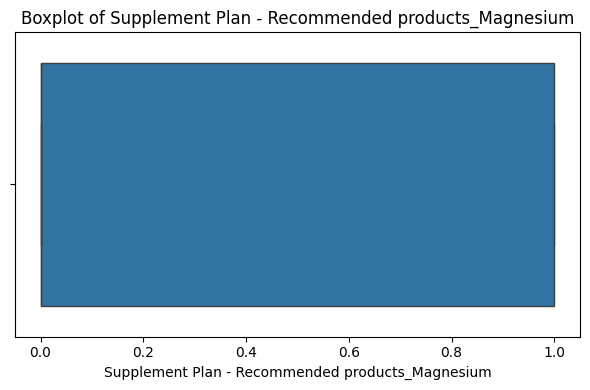

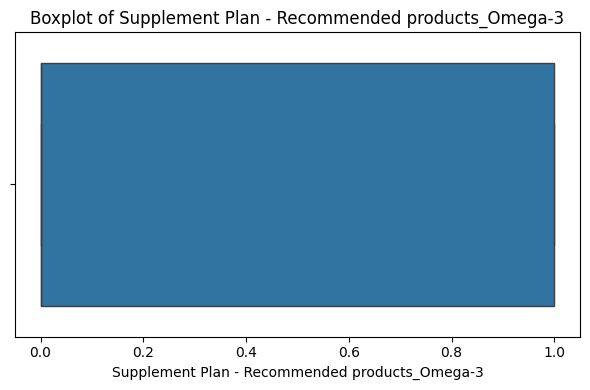

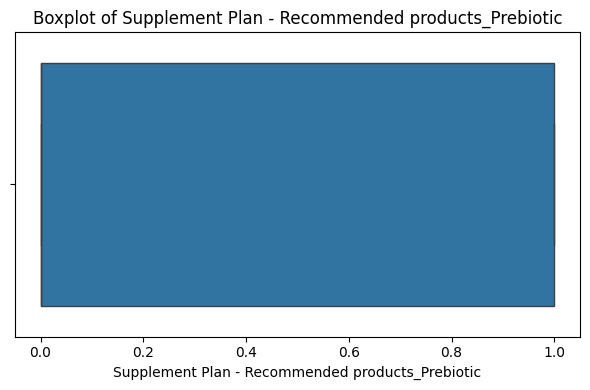

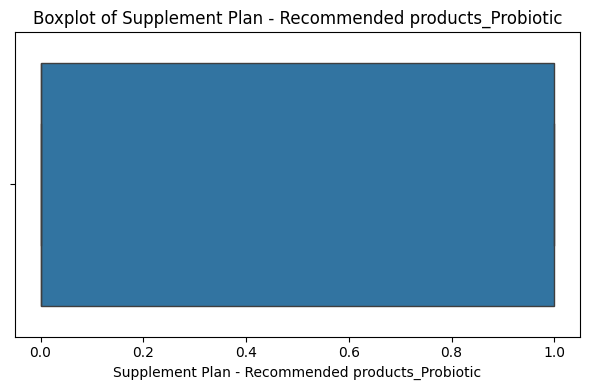

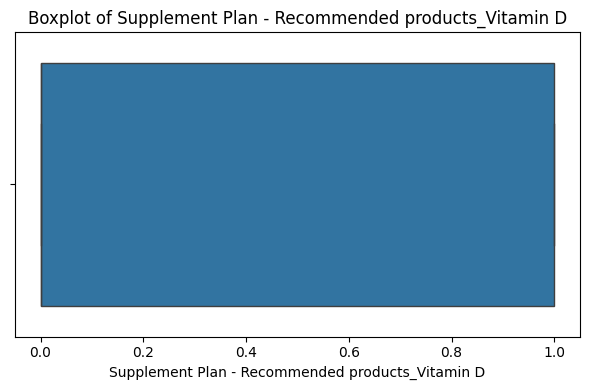

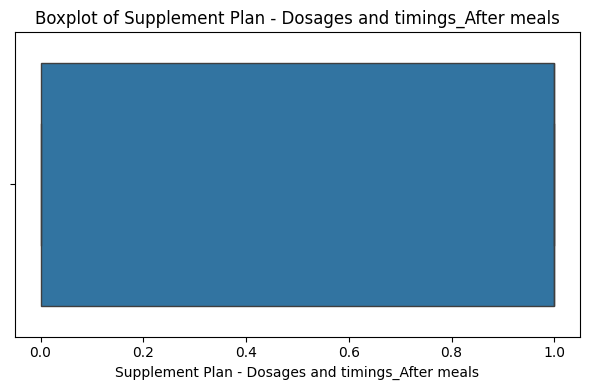

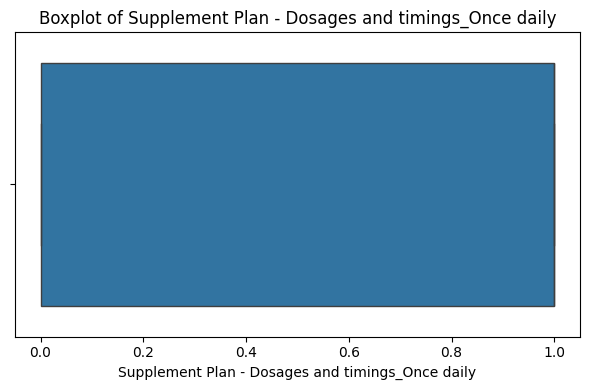

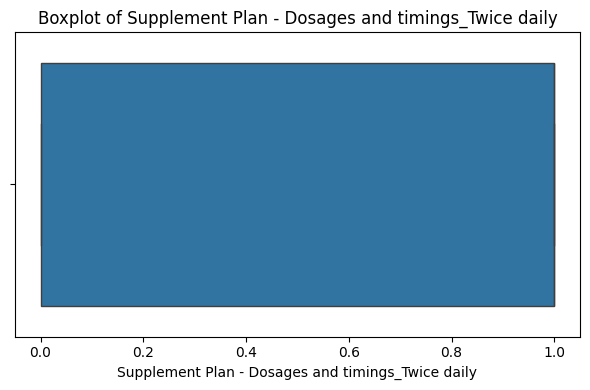

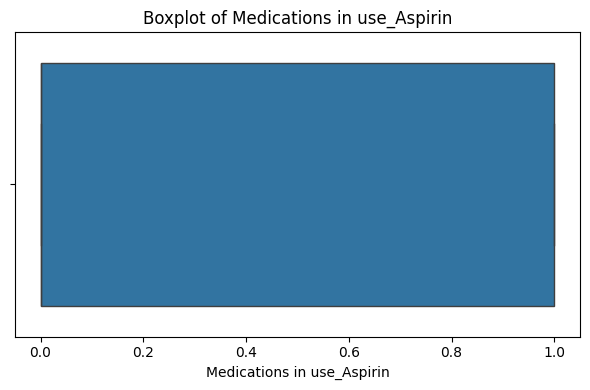

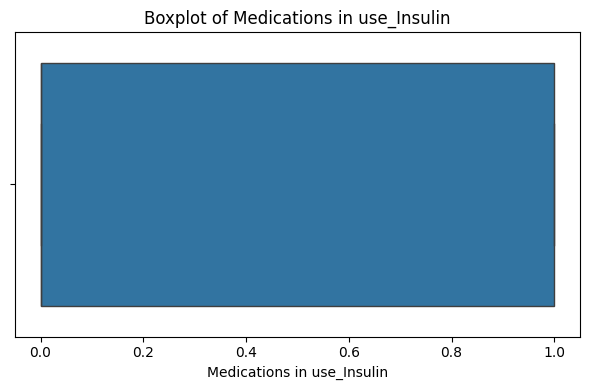

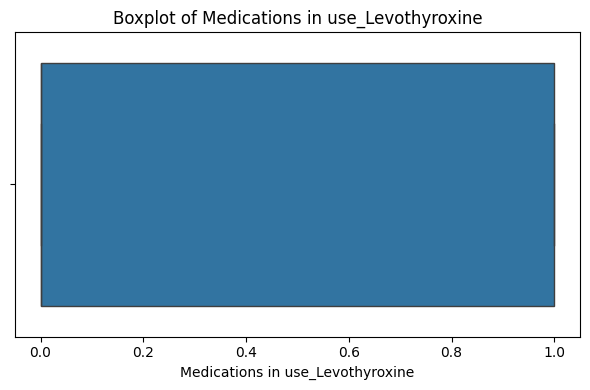

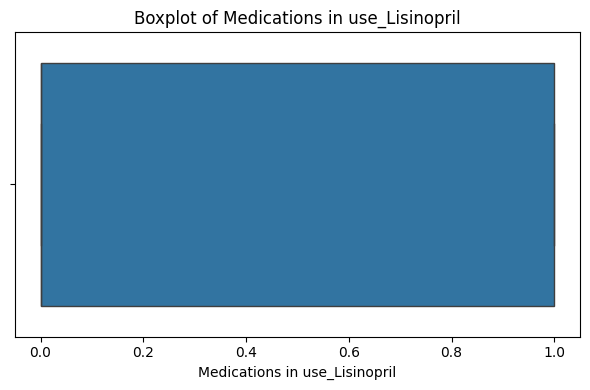

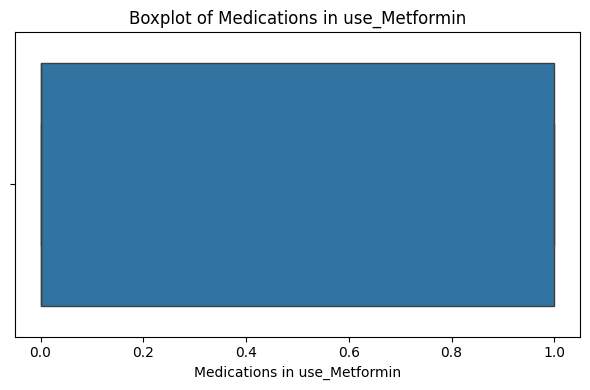

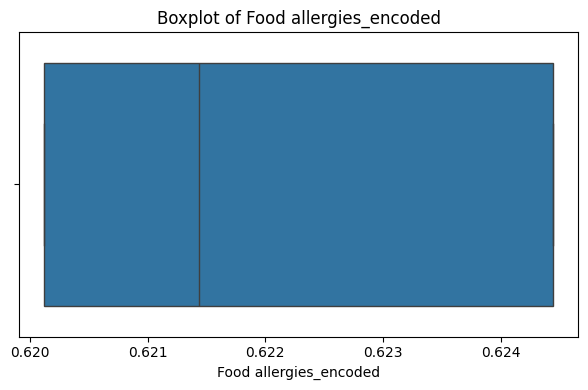

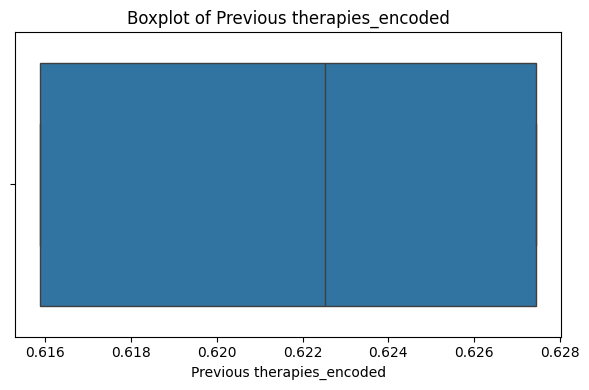

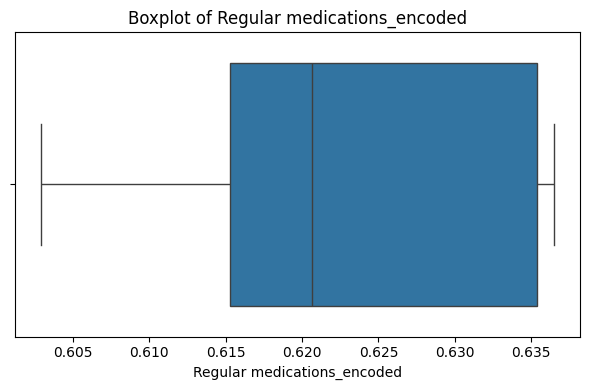

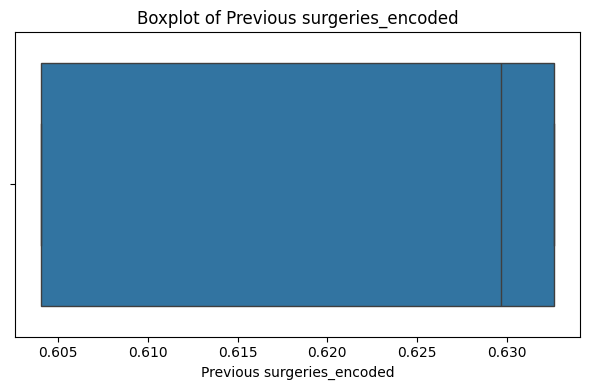

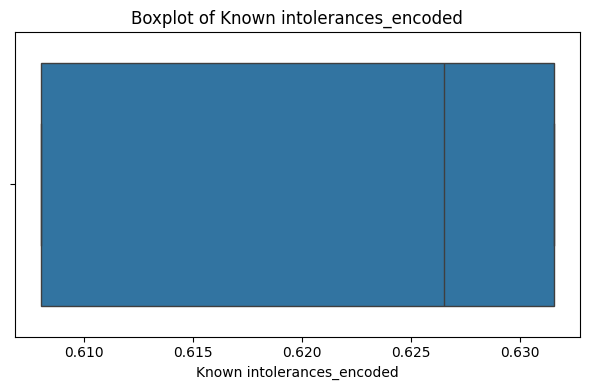

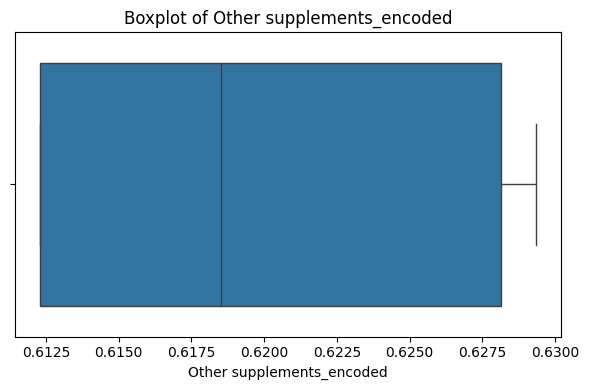

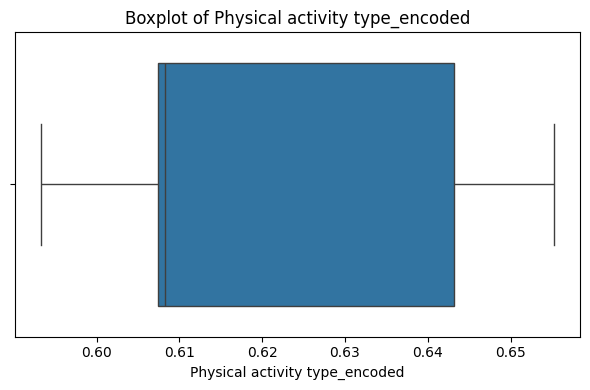

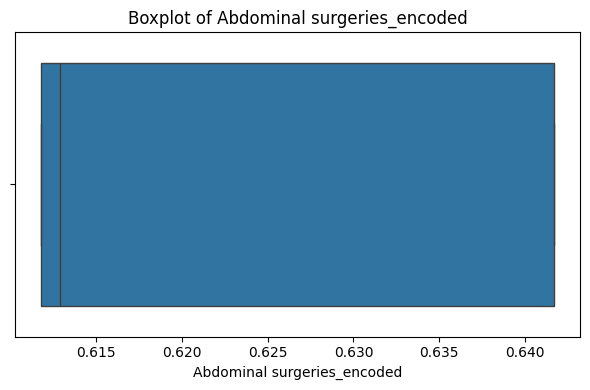

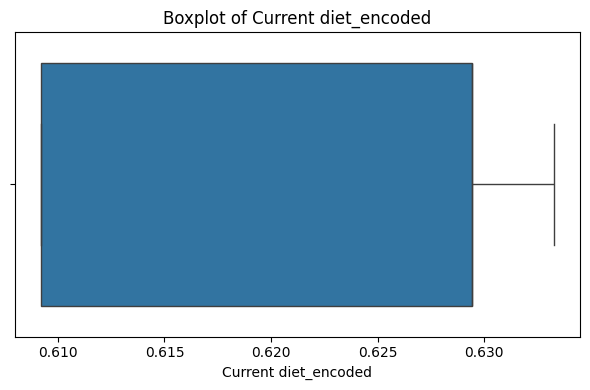

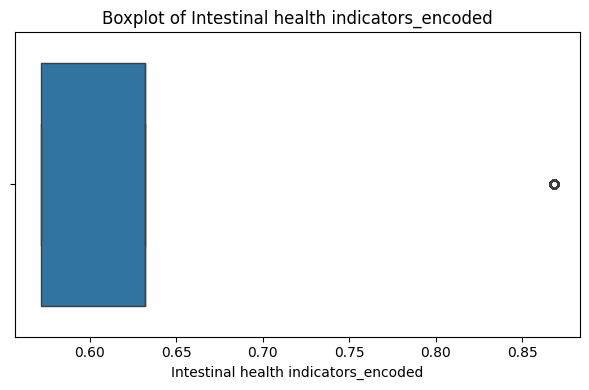

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = df_final_target.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_final_target[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

### outlier columns

*   BMI
*   Intestinal health indicators_encoded





### Remove outliers

In [16]:
def drop_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_final_target = drop_outliers_iqr(df_final_target, 'BMI')

df_final_target = drop_outliers_iqr(df_final_target, 'Intestinal health indicators_encoded')

print("New shape after dropping outliers:", df_final_target.shape)

New shape after dropping outliers: (9231, 89)


### SHAP analysis

In [17]:
df_final_target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9231 entries, 0 to 9999
Data columns (total 89 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Height (cm)                                        9231 non-null   int64  
 1   Weight (kg)                                        9231 non-null   int64  
 2   BMI                                                9231 non-null   float64
 3   Previous gastrointestinal issues                   9231 non-null   int64  
 4   Frequency of bowel movements                       9231 non-null   int64  
 5   Stool consistency (Bristol scale)                  9231 non-null   int64  
 6   Presence of bloating                               9231 non-null   int64  
 7   Presence of gas                                    9231 non-null   int64  
 8   Presence of abdominal pain                         9231 non-null   int64  
 9   Difficult dig

In [18]:
import pandas as pd
import numpy as np
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split

X = df_final_target.drop(columns=['Microbiota_status_ranked'])
y = df_final_target['Microbiota_status_ranked']

In [19]:
model = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', tree_method='hist')
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [20]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [21]:
class_names = ['Optimal', 'Suboptimal', 'At Risk']
shap_summary = {}

for class_idx, class_name in enumerate(class_names):
    shap_summary[class_name] = shap_values[:, :, class_idx].mean(axis=0)

In [24]:
shap_classwise_df = pd.DataFrame(shap_summary, index=X.columns)
shap_classwise_df = shap_classwise_df.sort_values(by='At Risk', ascending=False)
print(shap_classwise_df.head(20))

                                                    Optimal  Suboptimal  \
Smoking status (Yes/No, quantity)                  0.000000    0.000000   
Medications in use_Aspirin                         0.000402    0.000508   
Supplement Plan - Dosages and timings_Twice daily -0.000540   -0.000030   
Difficult digestion                                0.000027   -0.000543   
Family history of diseases_Hypertension            0.000168   -0.000507   
Meal Plan - Recommended/avoided foods_Broccoli     0.000392   -0.000140   
Prebiotics                                        -0.000144    0.000260   
Medications in use_Insulin                         0.000230    0.000727   
Diagnosed conditions_Hypertension                 -0.000062   -0.000506   
Supplement Plan - Dosages and timings_Once daily  -0.000270    0.000202   
Medical conditions_Anemia                         -0.000089   -0.000633   
Relevant family history_Hypertension              -0.000942   -0.000057   
Personalized recipes_Gril

### SHAP sum of multi label columns=replacing multi label single columns with SHAP sum values and return to their original single columns

In [25]:
group_columns = {
    'Medical conditions': [col for col in X.columns if col.startswith('Medical conditions_')],
    'Family history of diseases': [col for col in X.columns if col.startswith('Family history of diseases_')],
    'Diagnosed conditions': [col for col in X.columns if col.startswith('Diagnosed conditions_')],
    'Relevant family history': [col for col in X.columns if col.startswith('Relevant family history_')],
    'Meal Plan': [col for col in X.columns if col.startswith('Meal Plan')],
    'Weekly menu': [col for col in X.columns if col.startswith('Weekly menu')],
    'Personalized recipes': [col for col in X.columns if col.startswith('Personalized recipes')],
    'Supplement products': [col for col in X.columns if col.startswith('Supplement Plan - Recommended products')],
    'Supplement timings': [col for col in X.columns if col.startswith('Supplement Plan - Dosages and timings')],
    'Medications': [col for col in X.columns if col.startswith('Medications in use_')]
}

In [26]:
for group_name, subcols in group_columns.items():
    if subcols:
        col_indices = [X.columns.get_loc(c) for c in subcols]
        df_final_target[f'{group_name}_SHAP'] = shap_values[:, col_indices, 2].sum(axis=1)

In [27]:
flat_multilabel_columns = [col for cols in group_columns.values() for col in cols if col in df_final_target.columns]
df_final_target_cleaned = df_final_target.drop(columns=flat_multilabel_columns)

In [28]:
df_final_target_cleaned.shape

(9231, 53)

In [29]:
df1=df_final_target_cleaned

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9231 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Height (cm)                                       9231 non-null   int64  
 1   Weight (kg)                                       9231 non-null   int64  
 2   BMI                                               9231 non-null   float64
 3   Previous gastrointestinal issues                  9231 non-null   int64  
 4   Frequency of bowel movements                      9231 non-null   int64  
 5   Stool consistency (Bristol scale)                 9231 non-null   int64  
 6   Presence of bloating                              9231 non-null   int64  
 7   Presence of gas                                   9231 non-null   int64  
 8   Presence of abdominal pain                        9231 non-null   int64  
 9   Difficult digestion     

### Composite feature= utilizing given values, class wise shap values, domain knowledge

In [31]:
df1['Gut_Health_Score'] = (
    df1['Weekly consumption of fermented foods (portions)'] +
    df1['Probiotics'] +
    df1['Prebiotics'] -
    df1['Presence of bloating'] -
    df1['Presence of gas'] -
    df1['Presence of abdominal pain'] -
    df1['Difficult digestion']
)

# Composite Feature 2: Diet Quality Score
# Sum of weekly consumption of vegetables, fruits, whole grains, and plant proteins
df1['Diet_Quality_Score'] = (
    df1['Weekly consumption of vegetables (portions)'] +
    df1['Weekly consumption of fruits (portions)'] +
    df1['Weekly consumption of whole grains (portions)'] +
    df1['Weekly consumption of plant proteins (portions)']
)

# Composite Feature 3: Metabolic Risk Score
# Combines BMI and SHAP values related to metabolic conditions
df1['Metabolic_Risk_Score'] = (
    df1['BMI'] +
    df1['Medical conditions_SHAP'] +
    df1['Diagnosed conditions_SHAP']
)

# Composite Feature 4: Lifestyle Balance Index
# Combines daily water intake, average sleep hours, weekly physical activity, and inverses of stress level and smoking status
df1['Lifestyle_Balance_Index'] = (
    df1['Daily water intake (liters)'] +
    df1['Average sleep hours (hours)'] +
    df1['Weekly frequency of physical activity (per week)'] -
    df1['Stress level (1-10 scale)'] -
    df1['Smoking status (Yes/No, quantity)']
)

# Composite Feature 5: Supplement Compliance Score
# Sum of supplement plan intake tracking and automatic reminders
df1['Supplement_Compliance_Score'] = (
    df1['Supplement Plan - Intake tracking'] +
    df1['Supplement Plan - Automatic reminders']
)

# Composite Feature 6: Genetic Risk Score
# Sum of SHAP values related to family history and relevant family history
df1['Genetic_Risk_Score'] = (
    df1['Family history of diseases_SHAP'] +
    df1['Relevant family history_SHAP']
)

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9231 entries, 0 to 9999
Data columns (total 59 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Height (cm)                                       9231 non-null   int64  
 1   Weight (kg)                                       9231 non-null   int64  
 2   BMI                                               9231 non-null   float64
 3   Previous gastrointestinal issues                  9231 non-null   int64  
 4   Frequency of bowel movements                      9231 non-null   int64  
 5   Stool consistency (Bristol scale)                 9231 non-null   int64  
 6   Presence of bloating                              9231 non-null   int64  
 7   Presence of gas                                   9231 non-null   int64  
 8   Presence of abdominal pain                        9231 non-null   int64  
 9   Difficult digestion     

# Model training using all features

## First scale features

In [33]:
X_train1=df1.drop(columns=['Microbiota_status_ranked'])
y_train1=df1['Microbiota_status_ranked']

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train1)

## SMOTE to balance target class

In [35]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_balanced, y_balanced = sm.fit_resample(X_scaled, y_train1)

In [36]:
y_balanced.value_counts()

,count
Microbiota_status_ranked,
2,4381
0,4381
1,4381


# Model Creation

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

#### Logistic Regression

In [110]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [111]:
y_pred = model.predict(X_test)

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50       890
           1       0.50      0.47      0.48       886
           2       0.92      0.96      0.94       853

    accuracy                           0.64      2629
   macro avg       0.64      0.65      0.64      2629
weighted avg       0.64      0.64      0.64      2629



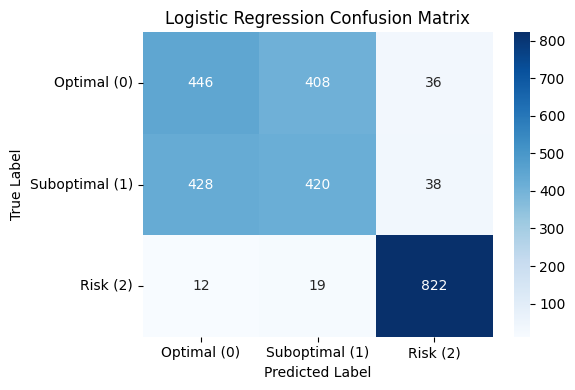

In [113]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression Confusion Matrix")
plt.xticks(ticks=[0.5,1.5,2.5], labels=["Optimal (0)", "Suboptimal (1)", "Risk (2)"])
plt.yticks(ticks=[0.5,1.5,2.5], labels=["Optimal (0)", "Suboptimal (1)", "Risk (2)"], rotation=0)
plt.tight_layout()
plt.show()

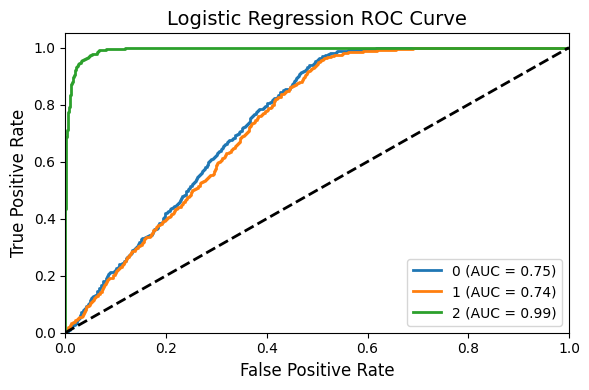

In [114]:
y_true = y_test

y_prob = model.predict_proba(X_test)

class_names = model.classes_

y_true_bin = label_binarize(y_true, classes=class_names)
n_classes = len(class_names)

plt.figure(figsize=(6, 4))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Logistic Regression ROC Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()

#### Random Forest

In [115]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=15, min_samples_split=8)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=8, n_estimators=500,
                       random_state=42)

In [116]:
rf_predictions = rf_model.predict(X_test)

In [118]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.51      0.50      0.51       890
           1       0.51      0.50      0.51       886
           2       0.95      0.98      0.97       853

    accuracy                           0.66      2629
   macro avg       0.66      0.66      0.66      2629
weighted avg       0.65      0.66      0.66      2629



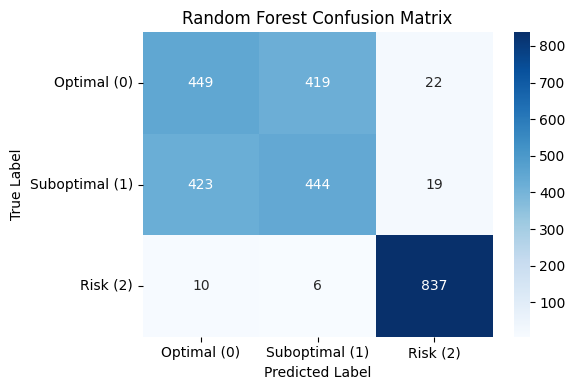

In [167]:
cm = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix")
plt.xticks(ticks=[0.5,1.5,2.5], labels=["Optimal (0)", "Suboptimal (1)", "Risk (2)"])
plt.yticks(ticks=[0.5,1.5,2.5], labels=["Optimal (0)", "Suboptimal (1)", "Risk (2)"], rotation=0)
plt.tight_layout()
plt.show()

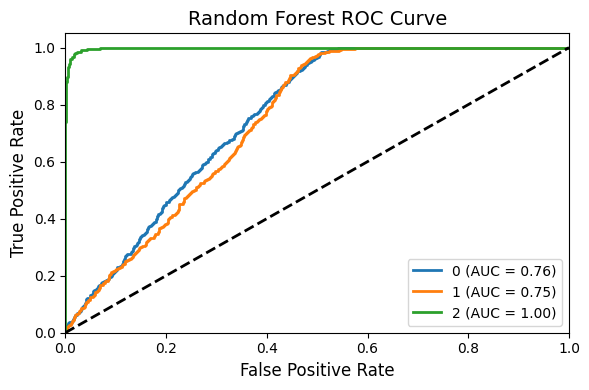

In [143]:
y_true = y_test

y_prob = rf_model.predict_proba(X_test)

class_names = rf_model.classes_

y_true_bin = label_binarize(y_true, classes=class_names)
n_classes = len(class_names)

plt.figure(figsize=(6, 4))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Random Forest ROC Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()

## Applied ANN with class weight

In [121]:
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import train_test_split

In [122]:
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

In [159]:
model = Sequential()

model.add(Dense(512, input_dim=X_train_final.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [160]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [161]:
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train_final),
                                     y=y_train_final)
class_weights = dict(enumerate(class_weights))

In [162]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

In [163]:
history = model.fit(X_train_final, y_train_final,
                    epochs=100, batch_size=32,
                    validation_data=(X_val_final, y_val_final),
                    callbacks=[early_stopping, reduce_lr],
                    class_weight=class_weights)

Epoch 1/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6232 - loss: 0.6794 - val_accuracy: 0.6520 - val_loss: 0.5418 - learning_rate: 0.0100
Epoch 2/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6440 - loss: 0.5683 - val_accuracy: 0.6523 - val_loss: 0.5229 - learning_rate: 0.0100
Epoch 3/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6542 - loss: 0.5585 - val_accuracy: 0.6527 - val_loss: 0.5303 - learning_rate: 0.0100
Epoch 4/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6658 - loss: 0.5279 - val_accuracy: 0.6588 - val_loss: 0.5172 - learning_rate: 0.0100
Epoch 5/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6696 - loss: 0.5225 - val_accuracy: 0.6664 - val_loss: 0.5066 - learning_rate: 0.0100
Epoch 6/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6657 - loss: 0.5335 - val_accuracy: 0.6611 - val_loss: 0.5101 - learning_rate: 0.0100
Epoch 7/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6777 - loss:

In [164]:
y_pred_probs = model.predict(X_val_final)
y_pred = y_pred_probs.argmax(axis=1)

print(classification_report(y_val_final, y_pred, digits=4))

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0     0.5210    0.4669    0.4925       876
           1     0.5159    0.5742    0.5435       876
           2     0.9908    0.9818    0.9863       877

    accuracy                         0.6744      2629
   macro avg     0.6759    0.6743    0.6741      2629
weighted avg     0.6760    0.6744    0.6742      2629



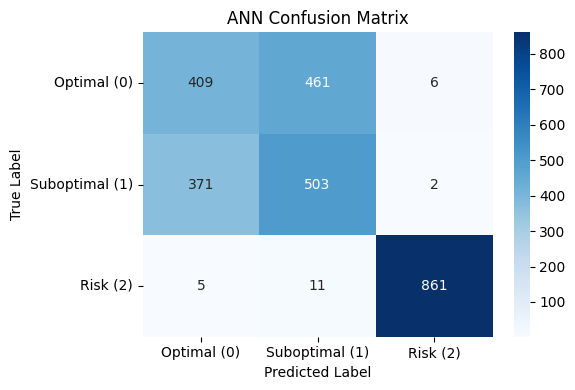

In [165]:
cm = confusion_matrix(y_val_final, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("ANN Confusion Matrix")
plt.xticks(ticks=[0.5,1.5,2.5], labels=["Optimal (0)", "Suboptimal (1)", "Risk (2)"])
plt.yticks(ticks=[0.5,1.5,2.5], labels=["Optimal (0)", "Suboptimal (1)", "Risk (2)"], rotation=0)
plt.tight_layout()
plt.show()

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


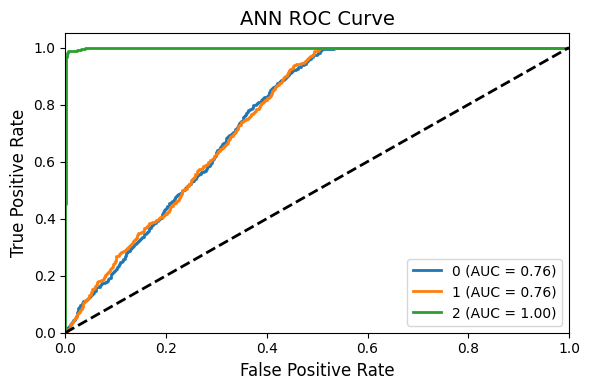

In [166]:
y_true = y_val_final

y_prob = model.predict(X_val_final)

class_names = np.array([0, 1, 2])

y_true_bin = label_binarize(y_true, classes=class_names)
n_classes = len(class_names)

plt.figure(figsize=(6, 4))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ANN ROC Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()

## MLP+feature interaction

In [145]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Multiply, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
import numpy as np

In [146]:
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

In [147]:
class_weights_array = compute_class_weight(class_weight='balanced',
                                           classes=np.unique(y_train_final),
                                           y=y_train_final)
class_weights = dict(enumerate(class_weights_array))
print("Class Weights:", class_weights)

Class Weights: {0: np.float64(0.9999048977650975), 1: np.float64(0.9999048977650975), 2: np.float64(1.0001902587519025)}


In [148]:
input_layer = Input(shape=(X_train_final.shape[1],))

x1 = Dense(128, activation='relu')(input_layer)
x1 = BatchNormalization()(x1)

x2 = Dense(128, activation='relu')(input_layer)
x2 = BatchNormalization()(x2)

interaction = Multiply()([x1, x2])

concat = Concatenate()([x1, interaction])
concat = Dropout(0.4)(concat)

x = Dense(64, activation='relu')(concat)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)

output = Dense(3, activation='softmax')(x)

In [149]:
model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [150]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

In [151]:
history = model.fit(X_train_final, y_train_final,
                    validation_data=(X_val_final, y_val_final),
                    epochs=100,
                    batch_size=32,
                    class_weight=class_weights,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4973 - loss: 1.0076 - val_accuracy: 0.6455 - val_loss: 0.5875 - learning_rate: 0.0010
Epoch 2/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6494 - loss: 0.6127 - val_accuracy: 0.6478 - val_loss: 0.5427 - learning_rate: 0.0010
Epoch 3/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6590 - loss: 0.5707 - val_accuracy: 0.6444 - val_loss: 0.5245 - learning_rate: 0.0010
Epoch 4/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6700 - loss: 0.5433 - val_accuracy: 0.6634 - val_loss: 0.5124 - learning_rate: 0.0010
Epoch 5/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6754 - loss: 0.5325 - val_accuracy: 0.6615 - val_loss: 0.5057 - learning_rate: 0.0010
Epoch 6/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6882 - loss: 0.5090 - val_accuracy: 0.6664 - val_loss: 0.5077 - learning_rate: 0.0010
Epoch 7/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6869 - loss: 0.

In [155]:
y_pred_probs = model.predict(X_val_final)
y_pred = np.argmax(y_pred_probs, axis=1)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [156]:
print(classification_report(y_val_final, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.5068    0.6758    0.5793       876
           1     0.5194    0.3356    0.4078       876
           2     0.9743    0.9943    0.9842       877

    accuracy                         0.6687      2629
   macro avg     0.6669    0.6686    0.6571      2629
weighted avg     0.6670    0.6687    0.6572      2629



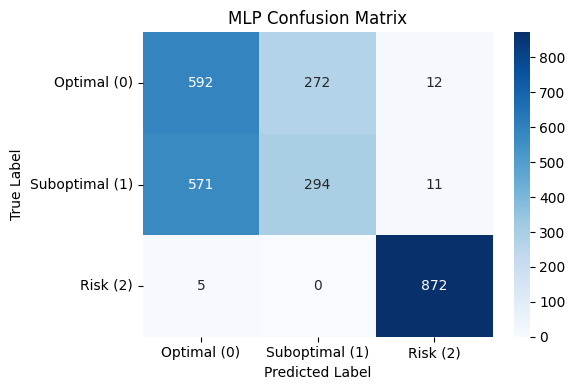

In [157]:
cm = confusion_matrix(y_val_final, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("MLP Confusion Matrix")
plt.xticks(ticks=[0.5,1.5,2.5], labels=["Optimal (0)", "Suboptimal (1)", "Risk (2)"])
plt.yticks(ticks=[0.5,1.5,2.5], labels=["Optimal (0)", "Suboptimal (1)", "Risk (2)"], rotation=0)
plt.tight_layout()
plt.show()

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


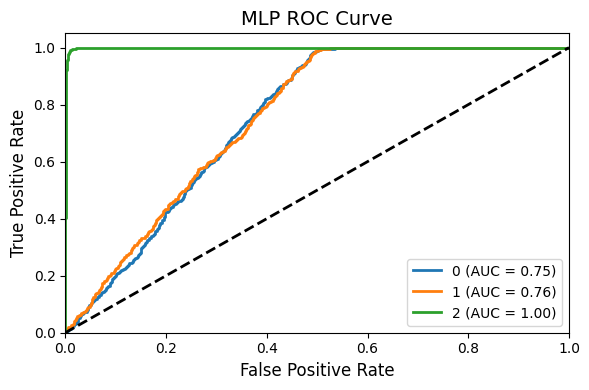

In [158]:
y_true = y_val_final

y_prob = model.predict(X_val_final)

class_names = np.array([0, 1, 2])

y_true_bin = label_binarize(y_true, classes=class_names)
n_classes = len(class_names)

plt.figure(figsize=(6, 4))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('MLP ROC Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()

## XGboost

In [174]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

In [175]:
X_train_xgb, X_val_xgb, y_train_xgb, y_val_xgb = train_test_split(
    X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42)

In [176]:
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train_xgb, y_train_xgb)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:14:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [177]:
y_pred_xgb = xgb_model.predict(X_val_xgb)

In [178]:
print(classification_report(y_val_xgb, y_pred_xgb, digits=4))

              precision    recall  f1-score   support

           0     0.4918    0.4772    0.4844       876
           1     0.4949    0.5011    0.4980       876
           2     0.9731    0.9897    0.9813       877

    accuracy                         0.6561      2629
   macro avg     0.6533    0.6560    0.6546      2629
weighted avg     0.6534    0.6561    0.6547      2629



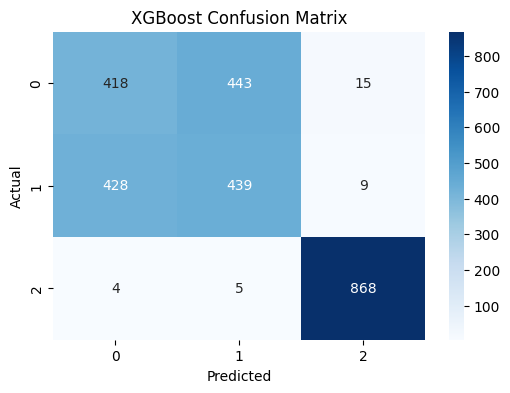

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val_xgb, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()

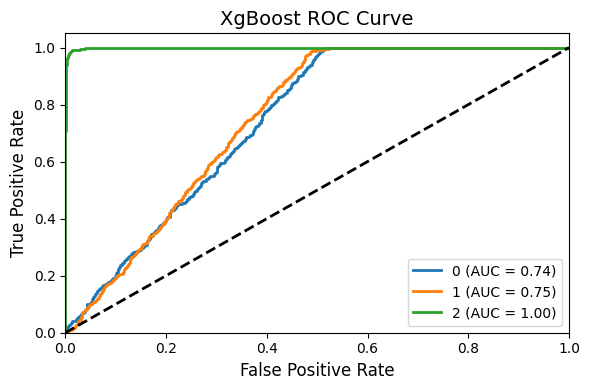

In [183]:
y_true = y_val_xgb

y_prob = xgb_model.predict_proba(X_val_xgb)

class_names = np.array([0, 1, 2])

y_true_bin = label_binarize(y_true, classes=class_names)
n_classes = len(class_names)

plt.figure(figsize=(6, 4))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('XgBoost ROC Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()

## Stacking of XGboost+MLP+Logistic regression

In [73]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np

In [184]:
X_train_stack, X_val_stack, y_train_stack, y_val_stack = train_test_split(
    X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42)

In [185]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_stack)
X_val_scaled = scaler.transform(X_val_stack)

In [186]:
base_learners = [
    ('xgb', XGBClassifier(objective='multi:softprob', num_class=3, use_label_encoder=False, eval_metric='mlogloss')),
    ('mlp', MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000))
]

In [187]:
stacked_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(),
    passthrough=True,  # (optional) feeds original features + base predictions to meta-model
    cv=5
)

In [188]:
stacked_model.fit(X_train_scaled, y_train_stack)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:16:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:17:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:17:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:17:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:17:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

StackingClassifier(cv=5,
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=Non...
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_class=3,
                                              num_parallel_tree=None, ...)),
                               ('mlp',
                                MLPClassifier(hidden_layer_sizes=(128, 64),
                                              max_iter=500, random_state=42)),
                               ('lr', LogisticRegression(max_iter=1000))],
                   final_estimator=LogisticRegression(), passthrough=True)

In [191]:
y_pred_stack = stacked_model.predict(X_val_scaled)

print(classification_report(y_val_stack, y_pred_stack, digits=4))

              precision    recall  f1-score   support

           0     0.5096    0.5148    0.5122       876
           1     0.5098    0.5034    0.5066       876
           2     0.9875    0.9897    0.9886       877

    accuracy                         0.6695      2629
   macro avg     0.6690    0.6693    0.6691      2629
weighted avg     0.6691    0.6695    0.6693      2629



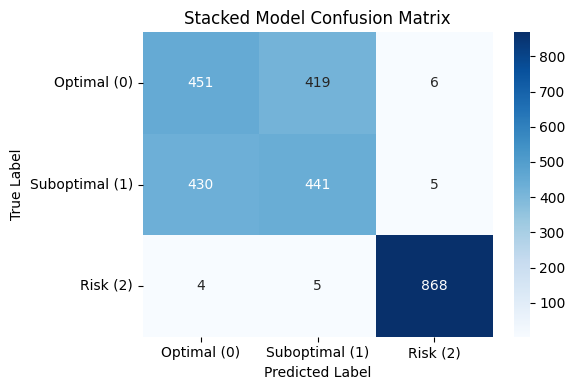

In [192]:
cm = confusion_matrix(y_val_stack, y_pred_stack)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Stacked Model Confusion Matrix")
plt.xticks(ticks=[0.5,1.5,2.5], labels=["Optimal (0)", "Suboptimal (1)", "Risk (2)"])
plt.yticks(ticks=[0.5,1.5,2.5], labels=["Optimal (0)", "Suboptimal (1)", "Risk (2)"], rotation=0)
plt.tight_layout()
plt.show()

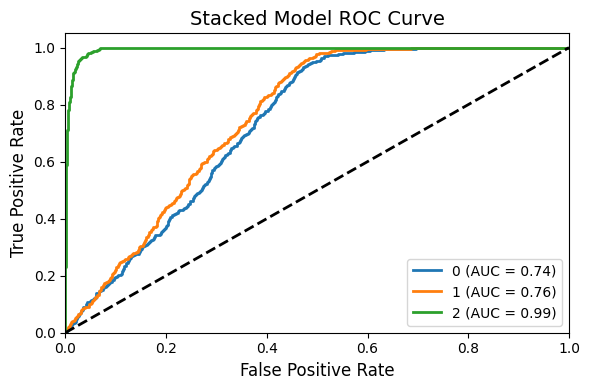

In [195]:
y_true = y_val_stack

y_prob = stacked_model.predict_proba(X_val_stack)

class_names = np.array([0, 1, 2])

y_true_bin = label_binarize(y_true, classes=class_names)
n_classes = len(class_names)

plt.figure(figsize=(6, 4))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Stacked Model ROC Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()

#### From the confusion matrix it's clear that model is confused between class 0 and 1. class 2 is quite clear to figure out for model.Hierarchical classification using XGboost may help, where we first seperate class 2 from (1 and 0) then finally distinguish between 0 and 1

# Hierarchical XgBoost

In [81]:
X_balanced = pd.DataFrame(X_balanced)
y_balanced = pd.Series(y_balanced)

In [82]:
y_binary_risk = (y_balanced == 2).astype(int)

In [83]:
X_train_risk, X_val_risk, y_train_risk, y_val_risk = train_test_split(
    X_balanced, y_binary_risk, test_size=0.2, stratify=y_binary_risk, random_state=42)

In [84]:
risk_clf = XGBClassifier(eval_metric='logloss', random_state=42)
risk_clf.fit(X_train_risk, y_train_risk)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [85]:
risk_preds = risk_clf.predict(X_val_risk)

In [86]:
non_risk_indices = [i for i, pred in enumerate(risk_preds) if pred == 0]
X_val_non_risk = X_val_risk.iloc[non_risk_indices]
true_labels_non_risk = y_balanced.iloc[X_val_risk.index[non_risk_indices]]

In [87]:
X_train_01 = X_balanced[y_balanced != 2]
y_train_01 = y_balanced[y_balanced != 2]

In [88]:
X_train_01, X_val_01, y_train_01, y_val_01 = train_test_split(
    X_train_01, y_train_01, test_size=0.2, stratify=y_train_01, random_state=42)

In [89]:
clf_01 = XGBClassifier(eval_metric='logloss', random_state=42)
clf_01.fit(X_train_01, y_train_01)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [90]:
preds_01 = clf_01.predict(X_val_non_risk)

In [91]:
final_preds = []

for i in range(len(X_val_risk)):
    if risk_preds[i] == 1:
        final_preds.append(2)
    else:
        pred_01_idx = non_risk_indices.index(i)
        final_preds.append(preds_01[pred_01_idx])

In [92]:
final_true = y_balanced.iloc[X_val_risk.index]

In [93]:
print(classification_report(final_true, final_preds, digits=4))

              precision    recall  f1-score   support

           0     0.8923    0.8823    0.8873       892
           1     0.8848    0.8920    0.8884       861
           2     0.9772    0.9806    0.9789       876

    accuracy                         0.9182      2629
   macro avg     0.9181    0.9183    0.9182      2629
weighted avg     0.9181    0.9182    0.9182      2629



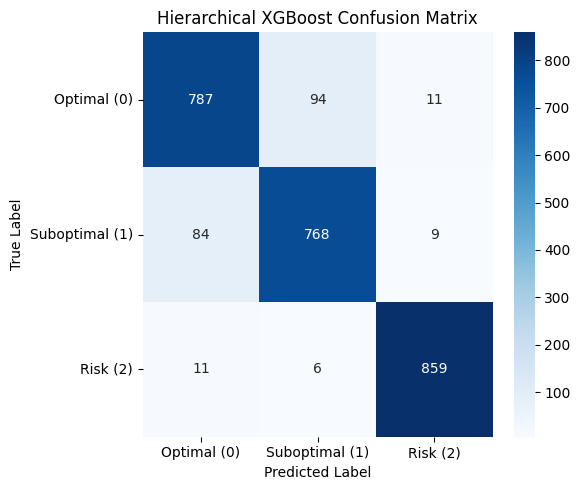

In [94]:
cm = confusion_matrix(final_true, final_preds)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Hierarchical XGBoost Confusion Matrix")
plt.xticks(ticks=[0.5,1.5,2.5], labels=["Optimal (0)", "Suboptimal (1)", "Risk (2)"])
plt.yticks(ticks=[0.5,1.5,2.5], labels=["Optimal (0)", "Suboptimal (1)", "Risk (2)"], rotation=0)
plt.tight_layout()
plt.show()

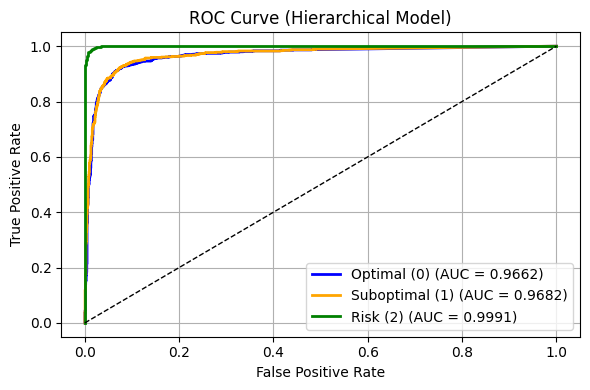

In [95]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

risk_probs = risk_clf.predict_proba(X_val_risk)[:, 1]
final_probs = np.zeros((len(X_val_risk), 3))
final_probs[:, 2] = risk_probs
non_risk_indices = np.where(risk_preds == 0)[0]
X_val_non_risk = X_val_risk.iloc[non_risk_indices]
probs_01 = clf_01.predict_proba(X_val_non_risk)

final_probs[non_risk_indices, 0] = probs_01[:, 0]
final_probs[non_risk_indices, 1] = probs_01[:, 1]

y_true_bin = label_binarize(final_true, classes=[0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], final_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(6, 4))
colors = ['blue', 'orange', 'green']
labels = ['Optimal (0)', 'Suboptimal (1)', 'Risk (2)']

for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Hierarchical Model)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Hyperparameter Tuning

#### Bayesian Optimization

In [196]:
pip install hyperopt

In [197]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
import warnings
warnings.filterwarnings('ignore')

In [198]:
space = {
    # Hyperparameters for risk_clf (binary risk classifier)
    'risk_learning_rate': hp.loguniform('risk_learning_rate', np.log(0.01), np.log(0.3)),
    'risk_max_depth': hp.quniform('risk_max_depth', 3, 10, 1),
    'risk_n_estimators': hp.quniform('risk_n_estimators', 50, 200, 10),
    'risk_subsample': hp.uniform('risk_subsample', 0.6, 1.0),
    'risk_colsample_bytree': hp.uniform('risk_colsample_bytree', 0.6, 1.0),
    # Hyperparameters for clf_01 (non-risk classifier)
    'clf01_learning_rate': hp.loguniform('clf01_learning_rate', np.log(0.01), np.log(0.3)),
    'clf01_max_depth': hp.quniform('clf01_max_depth', 3, 10, 1),
    'clf01_n_estimators': hp.quniform('clf01_n_estimators', 50, 200, 10),
    'clf01_subsample': hp.uniform('clf01_subsample', 0.6, 1.0),
    'clf01_colsample_bytree': hp.uniform('clf01_colsample_bytree', 0.6, 1.0),
}

In [199]:
def objective(params):
    params['risk_max_depth'] = int(params['risk_max_depth'])
    params['risk_n_estimators'] = int(params['risk_n_estimators'])
    params['clf01_max_depth'] = int(params['clf01_max_depth'])
    params['clf01_n_estimators'] = int(params['clf01_n_estimators'])

    risk_clf = XGBClassifier(
        learning_rate=params['risk_learning_rate'],
        max_depth=params['risk_max_depth'],
        n_estimators=params['risk_n_estimators'],
        subsample=params['risk_subsample'],
        colsample_bytree=params['risk_colsample_bytree'],
        eval_metric='logloss',
        random_state=42
    )
    risk_clf.fit(X_train_risk, y_train_risk)

    risk_preds = risk_clf.predict(X_val_risk)

    non_risk_indices = [i for i, pred in enumerate(risk_preds) if pred == 0]
    X_val_non_risk = X_val_risk.iloc[non_risk_indices]
    true_labels_non_risk = y_balanced.iloc[X_val_risk.index[non_risk_indices]]

    clf_01 = XGBClassifier(
        learning_rate=params['clf01_learning_rate'],
        max_depth=params['clf01_max_depth'],
        n_estimators=params['clf01_n_estimators'],
        subsample=params['clf01_subsample'],
        colsample_bytree=params['clf01_colsample_bytree'],
        eval_metric='logloss',
        random_state=42
    )
    clf_01.fit(X_train_01, y_train_01)

    preds_01 = clf_01.predict(X_val_non_risk)

    final_preds = []
    for i in range(len(X_val_risk)):
        if risk_preds[i] == 1:
            final_preds.append(2)
        else:
            pred_01_idx = non_risk_indices.index(i)
            final_preds.append(preds_01[pred_01_idx])

    final_true = y_balanced.iloc[X_val_risk.index]

    score = f1_score(final_true, final_preds, average='macro')

    return {'loss': -score, 'status': STATUS_OK}

In [200]:
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(42)
)

100%|██████████| 50/50 [04:44<00:00,  5.70s/trial, best loss: -0.9280491439463802]


In [202]:
best['risk_max_depth'] = int(best['risk_max_depth'])
best['risk_n_estimators'] = int(best['risk_n_estimators'])
best['clf01_max_depth'] = int(best['clf01_max_depth'])
best['clf01_n_estimators'] = int(best['clf01_n_estimators'])

In [203]:
best

{'clf01_colsample_bytree': np.float64(0.7793967008007608),
 'clf01_learning_rate': np.float64(0.2981623723732373),
 'clf01_max_depth': 7,
 'clf01_n_estimators': 60,
 'clf01_subsample': np.float64(0.7829729745163585),
 'risk_colsample_bytree': np.float64(0.9529018576647115),
 'risk_learning_rate': np.float64(0.14235502295814967),
 'risk_max_depth': 6,
 'risk_n_estimators': 110,
 'risk_subsample': np.float64(0.8654635031726544)}

In [204]:
risk_clf = XGBClassifier(
    learning_rate=best['risk_learning_rate'],
    max_depth=best['risk_max_depth'],
    n_estimators=best['risk_n_estimators'],
    subsample=best['risk_subsample'],
    colsample_bytree=best['risk_colsample_bytree'],
    eval_metric='logloss',
    random_state=42
)
risk_clf.fit(X_train_risk, y_train_risk)

clf_01 = XGBClassifier(
    learning_rate=best['clf01_learning_rate'],
    max_depth=best['clf01_max_depth'],
    n_estimators=best['clf01_n_estimators'],
    subsample=best['clf01_subsample'],
    colsample_bytree=best['clf01_colsample_bytree'],
    eval_metric='logloss',
    random_state=42
)
clf_01.fit(X_train_01, y_train_01)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=np.float64(0.7793967008007608), device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None,
              learning_rate=np.float64(0.2981623723732373), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=60, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [205]:
risk_preds = risk_clf.predict(X_val_risk)
non_risk_indices = [i for i, pred in enumerate(risk_preds) if pred == 0]
X_val_non_risk = X_val_risk.iloc[non_risk_indices]
true_labels_non_risk = y_balanced.iloc[X_val_risk.index[non_risk_indices]]
preds_01 = clf_01.predict(X_val_non_risk)

final_preds = []
for i in range(len(X_val_risk)):
    if risk_preds[i] == 1:
        final_preds.append(2)
    else:
        pred_01_idx = non_risk_indices.index(i)
        final_preds.append(preds_01[pred_01_idx])

final_true = y_balanced.iloc[X_val_risk.index]

In [206]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Performance metrics
accuracy = accuracy_score(final_true, final_preds)
precision = precision_score(final_true, final_preds, average='macro')
recall = recall_score(final_true, final_preds, average='macro')
f1 = f1_score(final_true, final_preds, average='macro')

print("Final Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Final Performance Metrics:
Accuracy: 0.9281
Precision: 0.9281
Recall: 0.9281
F1-Score: 0.9280


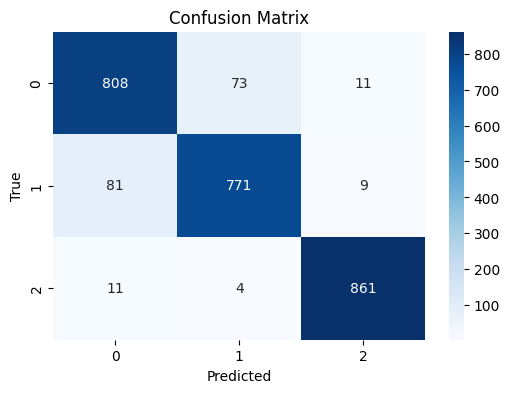

In [207]:
cm = confusion_matrix(final_true, final_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix.png')
plt.show()

#### Optuna

In [210]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 14.5 MB/s eta 0:00:00


In [211]:
import optuna

In [212]:
def objective(trial):
    risk_params = {
        'learning_rate': trial.suggest_float('risk_learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('risk_max_depth', 3, 10),
        'n_estimators': trial.suggest_int('risk_n_estimators', 50, 200, step=10),
        'subsample': trial.suggest_float('risk_subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('risk_colsample_bytree', 0.6, 1.0),
        'eval_metric': 'logloss',
        'random_state': 42
    }

    clf01_params = {
        'learning_rate': trial.suggest_float('clf01_learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('clf01_max_depth', 3, 10),
        'n_estimators': trial.suggest_int('clf01_n_estimators', 50, 200, step=10),
        'subsample': trial.suggest_float('clf01_subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('clf01_colsample_bytree', 0.6, 1.0),
        'eval_metric': 'logloss',
        'random_state': 42
    }

    risk_clf = XGBClassifier(**risk_params)
    risk_clf.fit(X_train_risk, y_train_risk)
    risk_preds = risk_clf.predict(X_val_risk)

    non_risk_indices = [i for i, pred in enumerate(risk_preds) if pred == 0]
    X_val_non_risk = X_val_risk.iloc[non_risk_indices]
    true_labels_non_risk = y_balanced.iloc[X_val_risk.index[non_risk_indices]]

    clf_01 = XGBClassifier(**clf01_params)
    clf_01.fit(X_train_01, y_train_01)
    preds_01 = clf_01.predict(X_val_non_risk)

    final_preds = []
    for i in range(len(X_val_risk)):
        if risk_preds[i] == 1:
            final_preds.append(2)
        else:
            pred_01_idx = non_risk_indices.index(i)
            final_preds.append(preds_01[pred_01_idx])

    final_true = y_balanced.iloc[X_val_risk.index]

    score = f1_score(final_true, final_preds, average='macro')

    return score

In [213]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

[I 2025-05-16 11:13:48,525] A new study created in memory with name: no-name-7b474c75-f0f9-41db-bf63-8e0460429881


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-05-16 11:13:57,993] Trial 0 finished with value: 0.9113795726046608 and parameters: {'risk_learning_rate': 0.04941134567681851, 'risk_max_depth': 4, 'risk_n_estimators': 190, 'risk_subsample': 0.9298453610150484, 'risk_colsample_bytree': 0.840962236224618, 'clf01_learning_rate': 0.2994751477061022, 'clf01_max_depth': 7, 'clf01_n_estimators': 100, 'clf01_subsample': 0.676080035116445, 'clf01_colsample_bytree': 0.9733958245883932}. Best is trial 0 with value: 0.9113795726046608.
[I 2025-05-16 11:14:02,489] Trial 1 finished with value: 0.817571875755731 and parameters: {'risk_learning_rate': 0.12141142991284634, 'risk_max_depth': 5, 'risk_n_estimators': 80, 'risk_subsample': 0.9087087030950197, 'risk_colsample_bytree': 0.9256504502825749, 'clf01_learning_rate': 0.06568390964125204, 'clf01_max_depth': 5, 'clf01_n_estimators': 50, 'clf01_subsample': 0.845580171612772, 'clf01_colsample_bytree': 0.605551206958617}. Best is trial 0 with value: 0.9113795726046608.
[I 2025-05-16 11:14:12

In [214]:
print("Best hyperparameters:", study.best_params)
print("Best F1-score:", study.best_value)

Best hyperparameters: {'risk_learning_rate': 0.17236050760964577, 'risk_max_depth': 4, 'risk_n_estimators': 80, 'risk_subsample': 0.877554349063778, 'risk_colsample_bytree': 0.8318340308198852, 'clf01_learning_rate': 0.18725317660608456, 'clf01_max_depth': 10, 'clf01_n_estimators': 160, 'clf01_subsample': 0.9360559160550482, 'clf01_colsample_bytree': 0.9134887656734141}
Best F1-score: 0.9257904553458359


In [215]:
risk_params = {
    'learning_rate': study.best_params['risk_learning_rate'],
    'max_depth': study.best_params['risk_max_depth'],
    'n_estimators': study.best_params['risk_n_estimators'],
    'subsample': study.best_params['risk_subsample'],
    'colsample_bytree': study.best_params['risk_colsample_bytree'],
    'eval_metric': 'logloss',
    'random_state': 42
}

In [216]:
clf01_params = {
    'learning_rate': study.best_params['clf01_learning_rate'],
    'max_depth': study.best_params['clf01_max_depth'],
    'n_estimators': study.best_params['clf01_n_estimators'],
    'subsample': study.best_params['clf01_subsample'],
    'colsample_bytree': study.best_params['clf01_colsample_bytree'],
    'eval_metric': 'logloss',
    'random_state': 42
}

In [217]:
risk_clf = XGBClassifier(**risk_params)
risk_clf.fit(X_train_risk, y_train_risk)

clf_01 = XGBClassifier(**clf01_params)
clf_01.fit(X_train_01, y_train_01)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9134887656734141, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.18725317660608456,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=160, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [218]:
risk_preds = risk_clf.predict(X_val_risk)
non_risk_indices = [i for i, pred in enumerate(risk_preds) if pred == 0]
X_val_non_risk = X_val_risk.iloc[non_risk_indices]
true_labels_non_risk = y_balanced.iloc[X_val_risk.index[non_risk_indices]]
preds_01 = clf_01.predict(X_val_non_risk)

In [219]:
final_preds = []
for i in range(len(X_val_risk)):
    if risk_preds[i] == 1:
        final_preds.append(2)
    else:
        pred_01_idx = non_risk_indices.index(i)
        final_preds.append(preds_01[pred_01_idx])

final_true = y_balanced.iloc[X_val_risk.index]

In [220]:
accuracy = accuracy_score(final_true, final_preds)
precision = precision_score(final_true, final_preds, average='macro')
recall = recall_score(final_true, final_preds, average='macro')
f1 = f1_score(final_true, final_preds, average='macro')

print("Final Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Final Performance Metrics:
Accuracy: 0.9258
Precision: 0.9258
Recall: 0.9258
F1-Score: 0.9258


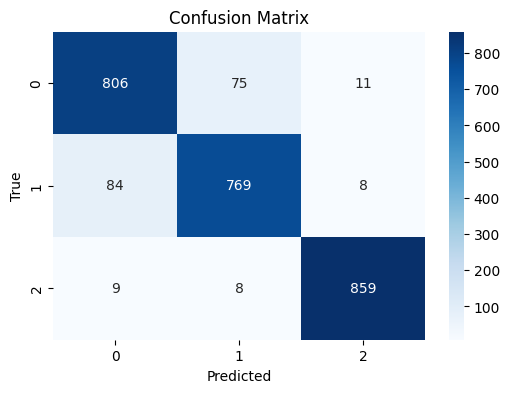

In [221]:
cm = confusion_matrix(final_true, final_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix.png')
plt.show()